---
# Decision Tree
- A non-parametric supervised learning method
- Can be used for classification
- Goal: Create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features  
  
<img src="https://upload.wikimedia.org/wikipedia/commons/c/c6/Manual_decision_tree.jpg" alt="Decision Tree example diagram" width="400"/>

The scikit-learn already have a Decision Tree class implemented for us, which is [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). We don't have to implement Decision Tree again.

> According to students' feedback, remember to open the desired conda environment before installing packages:  
> (1) open terminal  
> (2) type in `conda activate comp4331` (activate your conda environment)  
> (3) type in `conda install -c conda-forge scikit-learn` (install scikit-learn)

The following is a minimal decision tree classification example:

In [1]:
# import (load) the DecisionTreeClassifier class from scikit-learn package
from sklearn import tree

# get labeled data from somewhere
X_train = [[0, 0], [1, 1]]
y_train = [0, 1]

# create a decision tree classifier
clf = tree.DecisionTreeClassifier()

# fit the classifier to the dataset
clf = clf.fit(X_train, y_train)

# make predictions with unseen feature
y_pred = clf.predict([[2, 2]])

In [2]:
print(f"prediction value is {y_pred}")

prediction value is [1]


In the above example, the DecisionTreeClassifier object takes as input two arrays, one holding the training samples, and the other holding the class labels for the training samples.   
After fitting, the model can then be used to predict the class of samples.

We can plot the tree with the [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree) function:

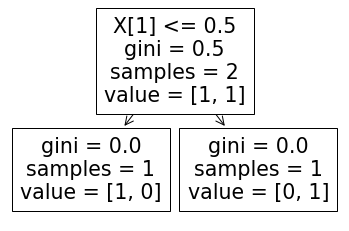

In [3]:
# plot decision tree
import matplotlib.pyplot as plt
plt.figure()
tree.plot_tree(clf)
plt.savefig("decision_tree.png")
plt.show()

## Compare attribute selection measures: "information gain" and "gini index"
`DecisionTreeClassifier(`**`criterion='gini'`**`, splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)` shows the default values of DecisionTreeClassifier's parameters.

By default, it uses gini index/impurity. To use information gain as selection measure, set `criterion='entropy'` when creating a deccision tree:

Also, let's use a bigger dataset, the [optical recognition of handwritten digits dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset) from scikit-learn package, to compare the performance of "information gain"-based and "gini index"-based decision tree.  
We repeat the building process and testing process 50 times, and report the mean and variance of the 50 accuracy scores.

In [4]:
train_scores = []
test_scores = []
for seed in range(50):
	
	# import (load) the DecisionTreeClassifier class from scikit-learn package
	from sklearn import tree
	from sklearn.model_selection import train_test_split

	# get labeled data from somewhere
	from sklearn.datasets import load_digits
	dataset = load_digits(n_class=2)
	X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, random_state=seed)
	import numpy as np
	dataset.target_names = np.array([str(i) for i in dataset.target_names])

	# create a decision tree classifier
	clf = tree.DecisionTreeClassifier()

	# fit the classifier to the dataset
	clf = clf.fit(X_train, y_train)

	# # save and plot decision tree
	# import matplotlib.pyplot as plt
	# plt.figure(figsize=(20, 10)) # increase fig size
	# tree.plot_tree(clf, feature_names=dataset.feature_names, 
	# 			class_names=dataset.target_names, filled=True, rounded=True)
	# print(f"\n\n")
	# print(f"Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1")
	# print(f"max_depth={clf.get_depth()}, number of leaves = {clf.get_n_leaves()}")
	# plt.show()

	# test the accuracy of the learned decision tree
	from sklearn.metrics import accuracy_score
	train_score = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
	test_score = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))

	# collect accuracy scores
	train_scores.append(train_score)
	test_scores.append(test_score)

import numpy as np
print("Average of accuracy score on train dataset: ", np.array([train_scores]).mean())
print("Average of accuracy score on test dataset: ", np.array([test_scores]).mean())
print("Varaince of accuracy score on test dataset: ", np.array([test_scores]).var())

Average of accuracy score on train dataset:  1.0
Average of accuracy score on test dataset:  0.9886666666666667
Varaince of accuracy score on test dataset:  0.00018513580246913575





Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=3, number of leaves = 4


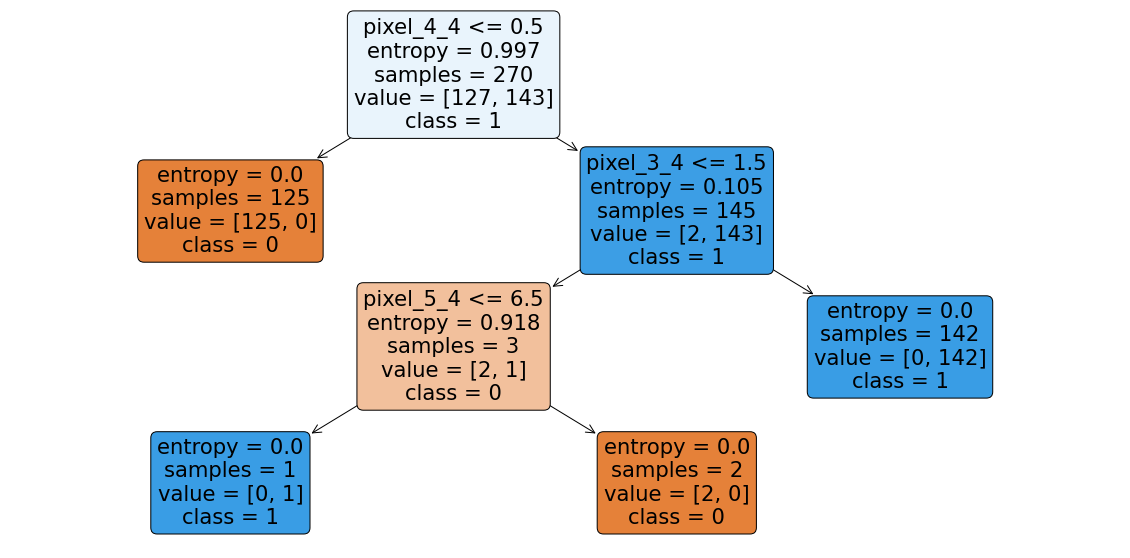




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=3, number of leaves = 4


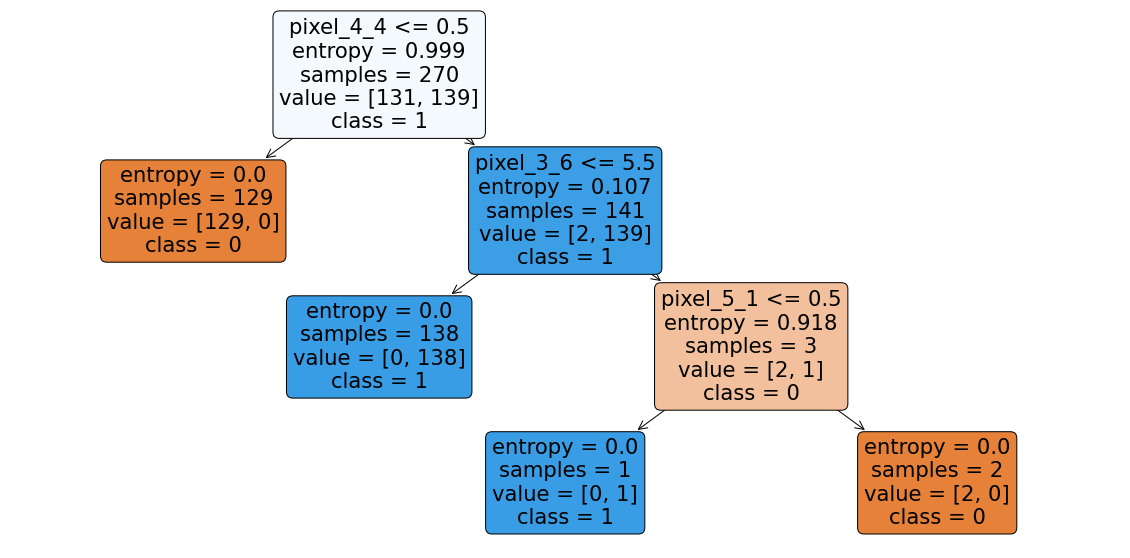




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=3, number of leaves = 4


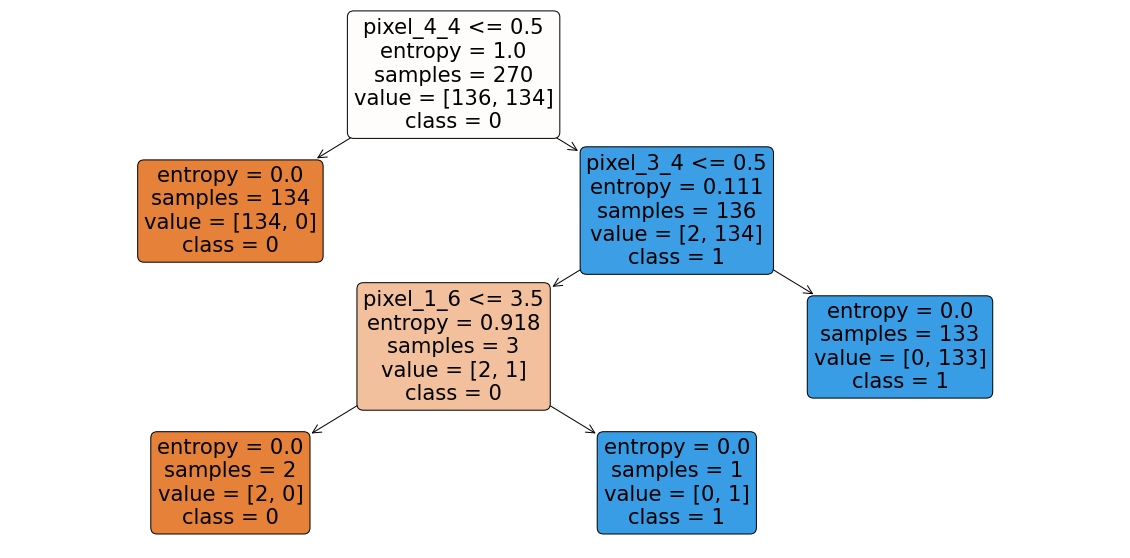




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


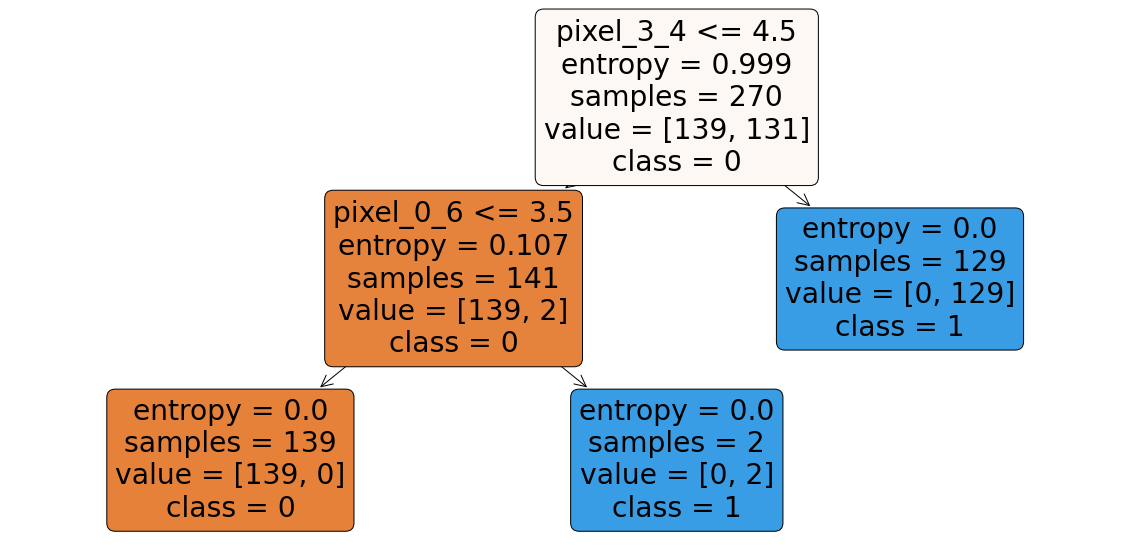




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=3, number of leaves = 4


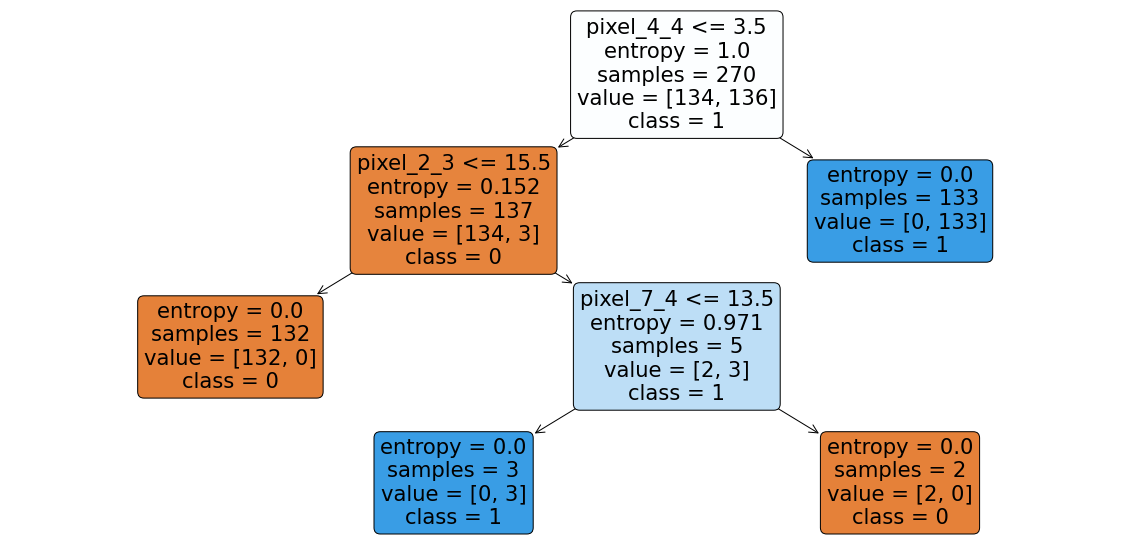




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


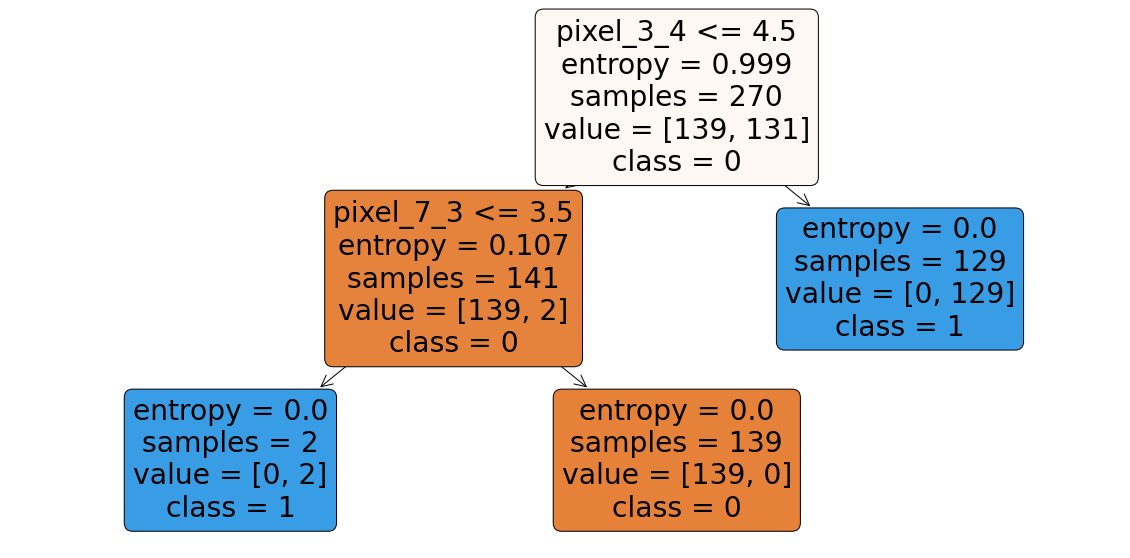




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


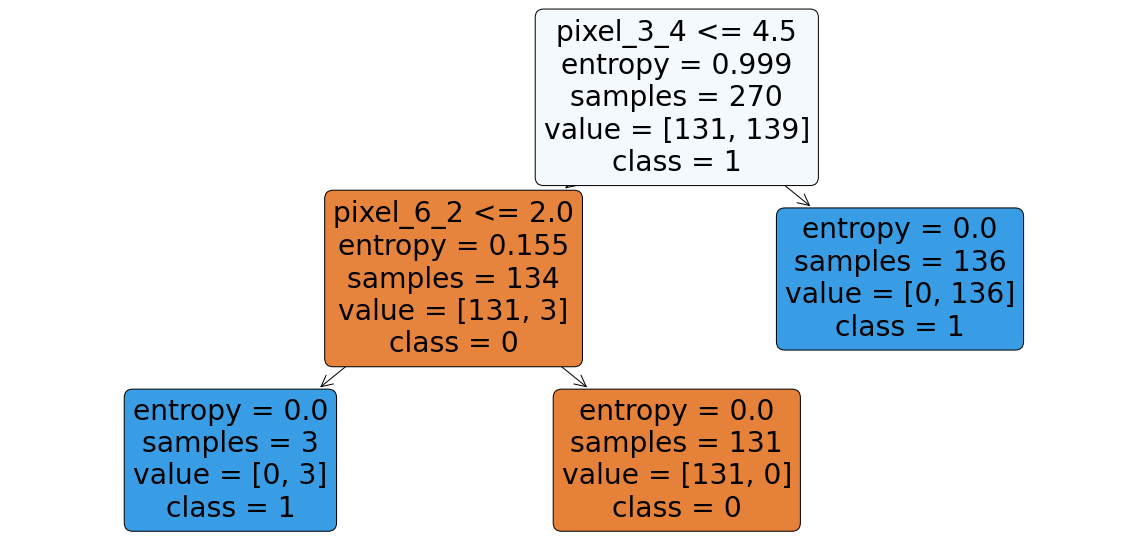




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


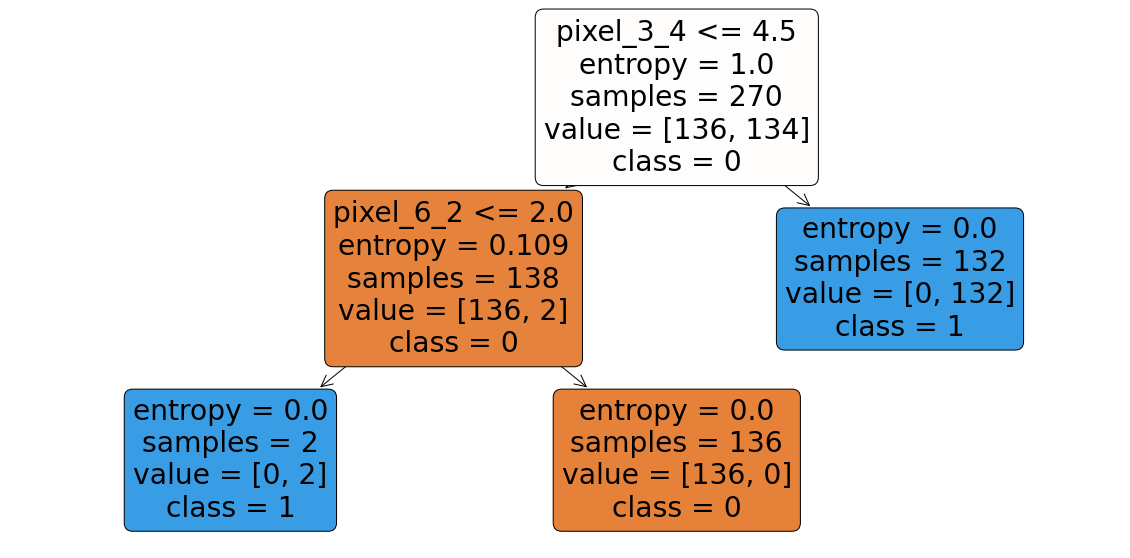




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=3, number of leaves = 4


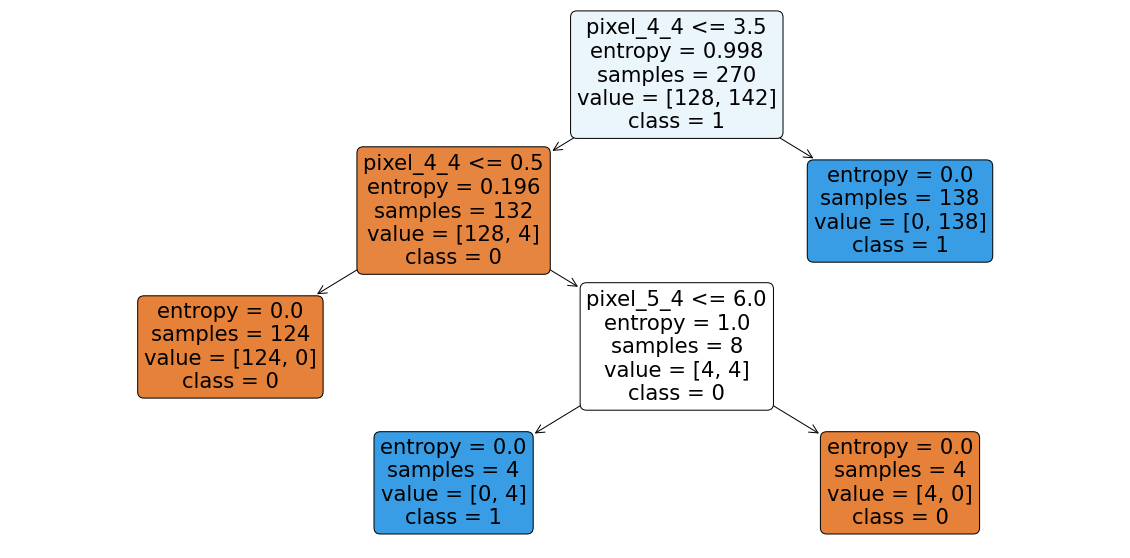




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


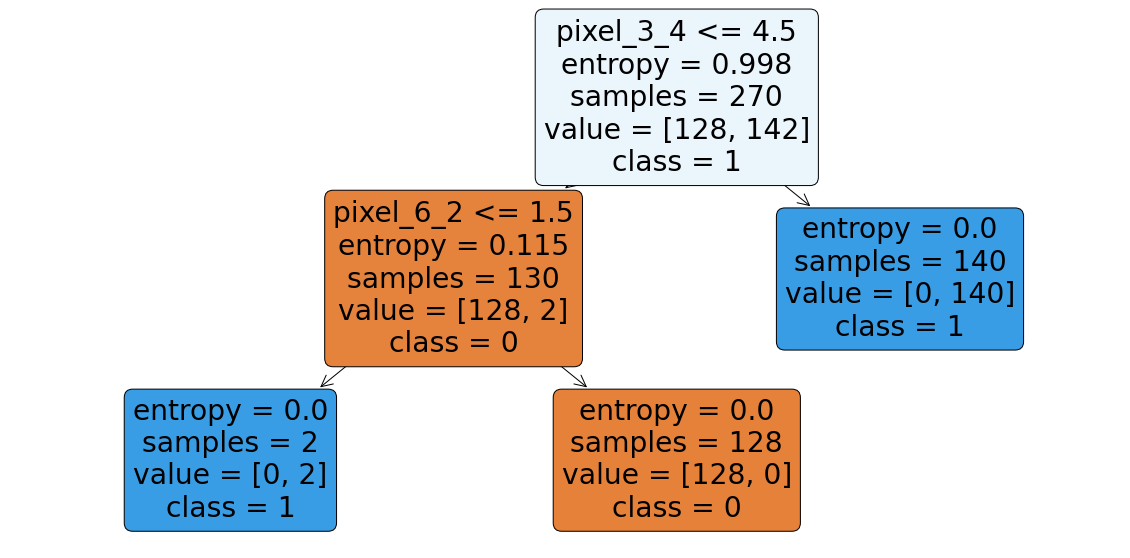




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


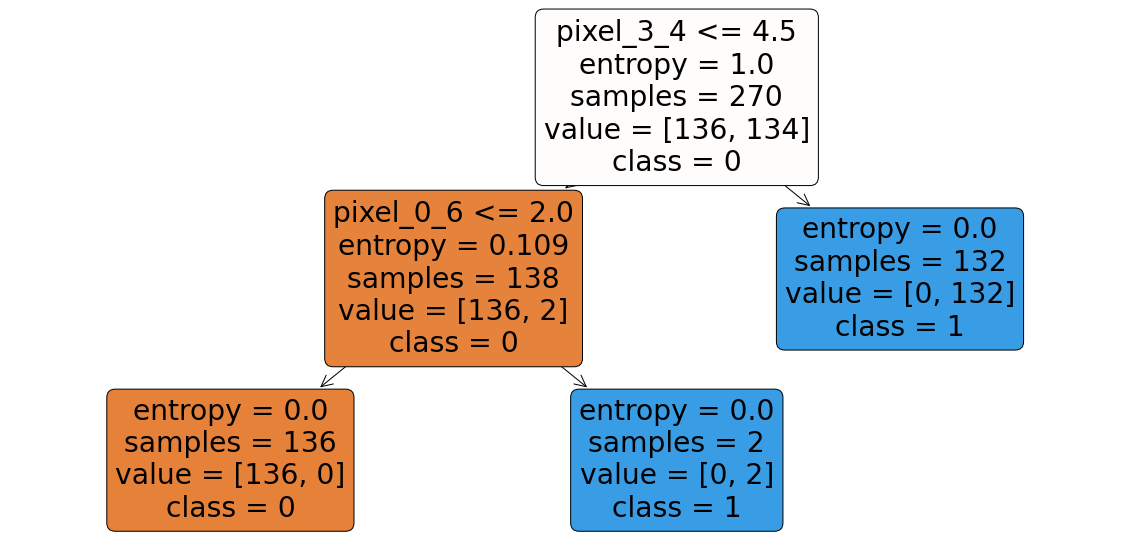




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


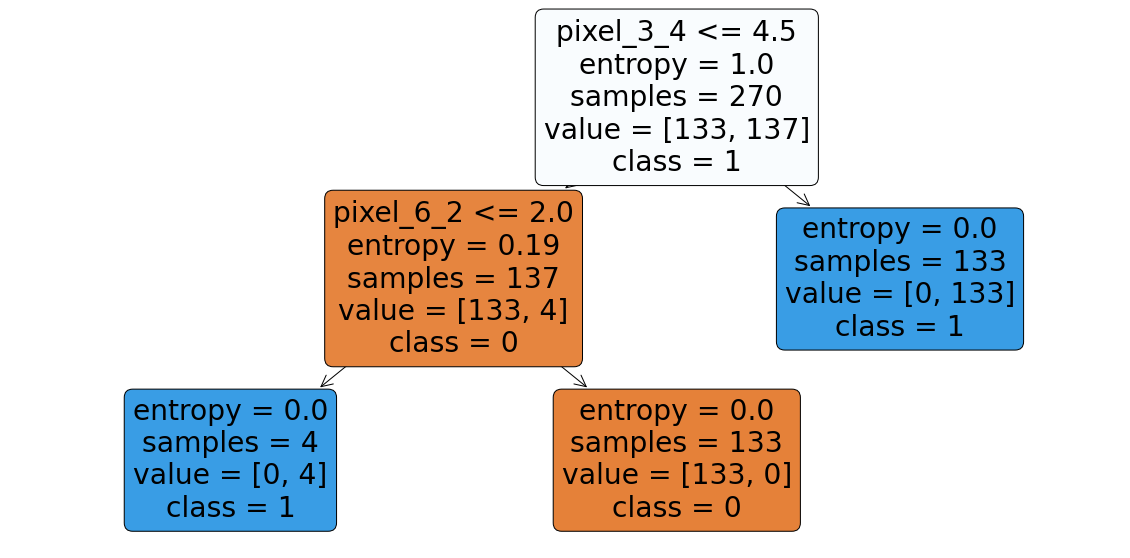




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


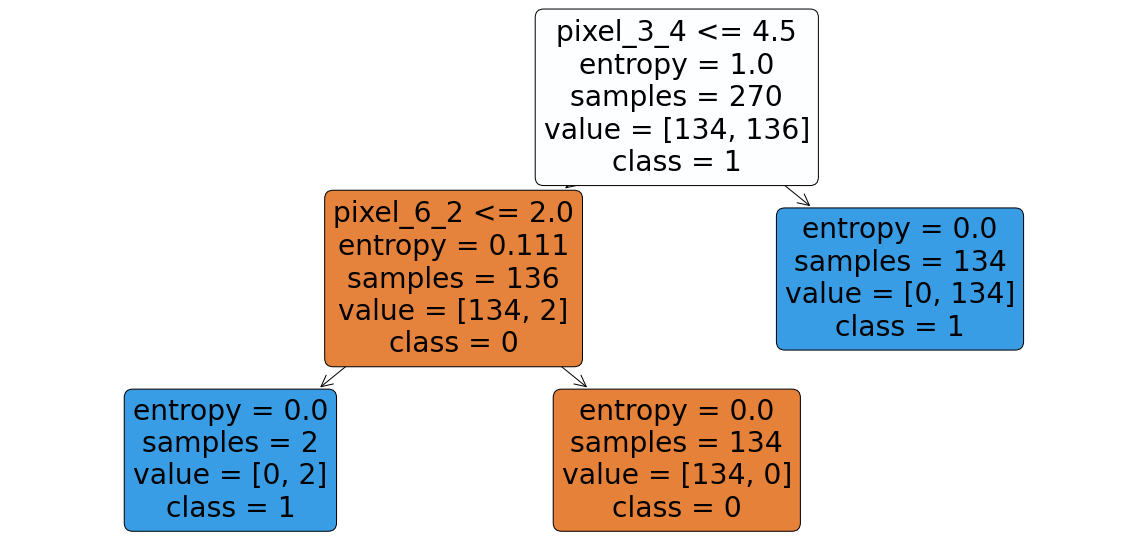




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=3, number of leaves = 4


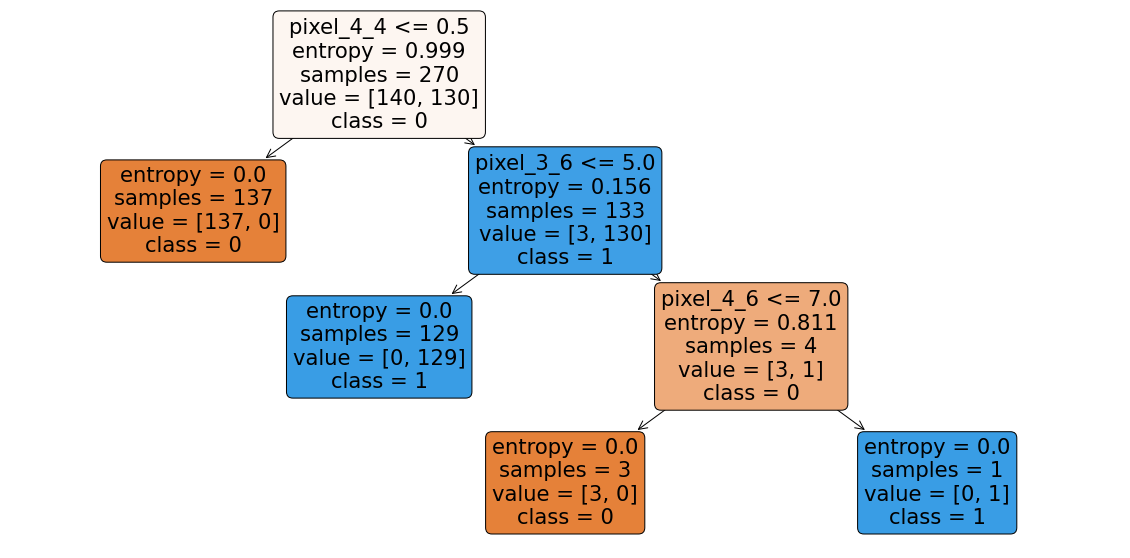




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=3, number of leaves = 4


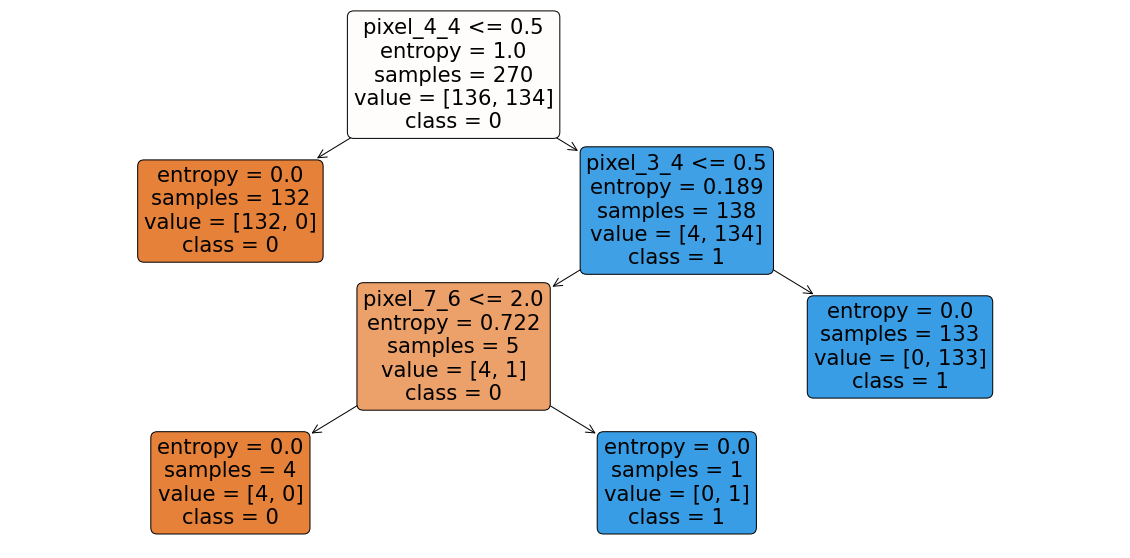




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=3, number of leaves = 4


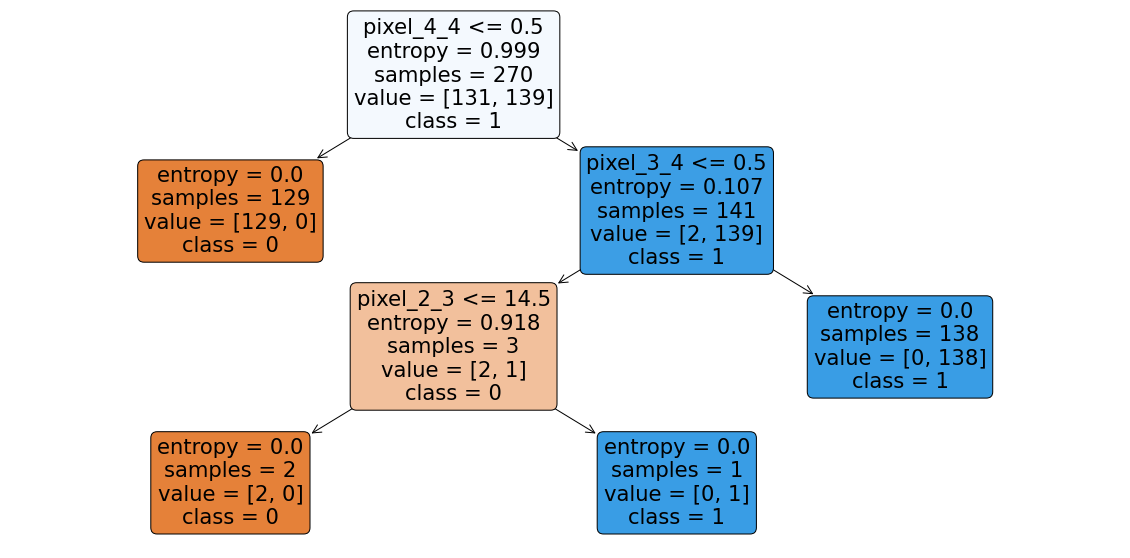




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=3, number of leaves = 4


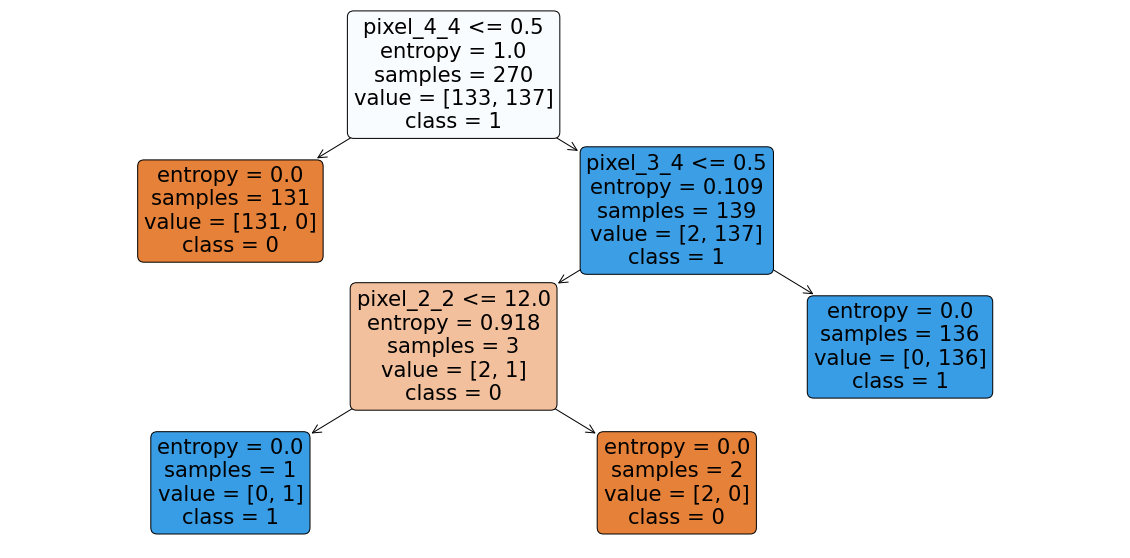




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


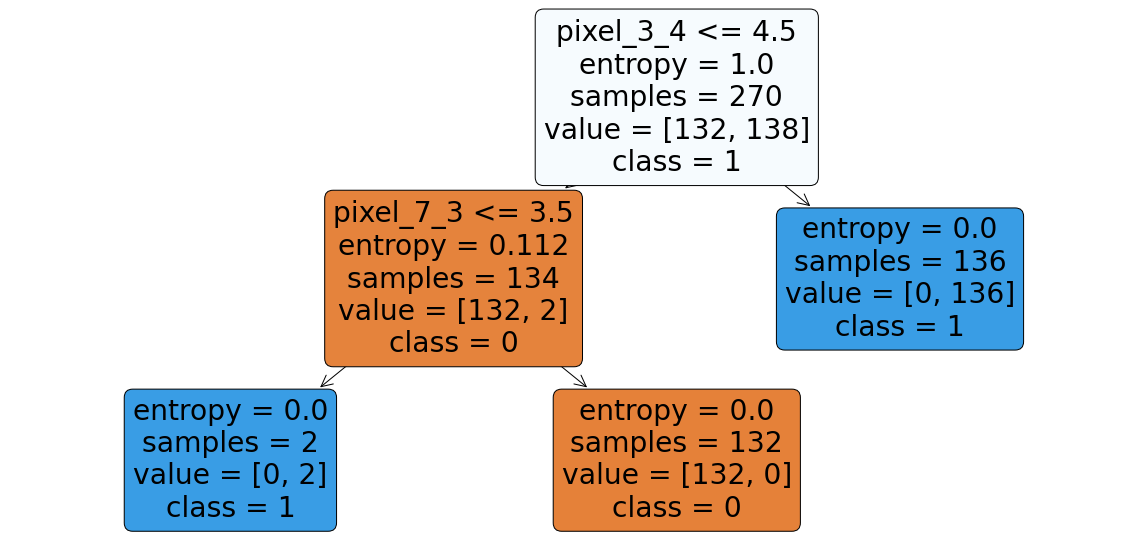




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


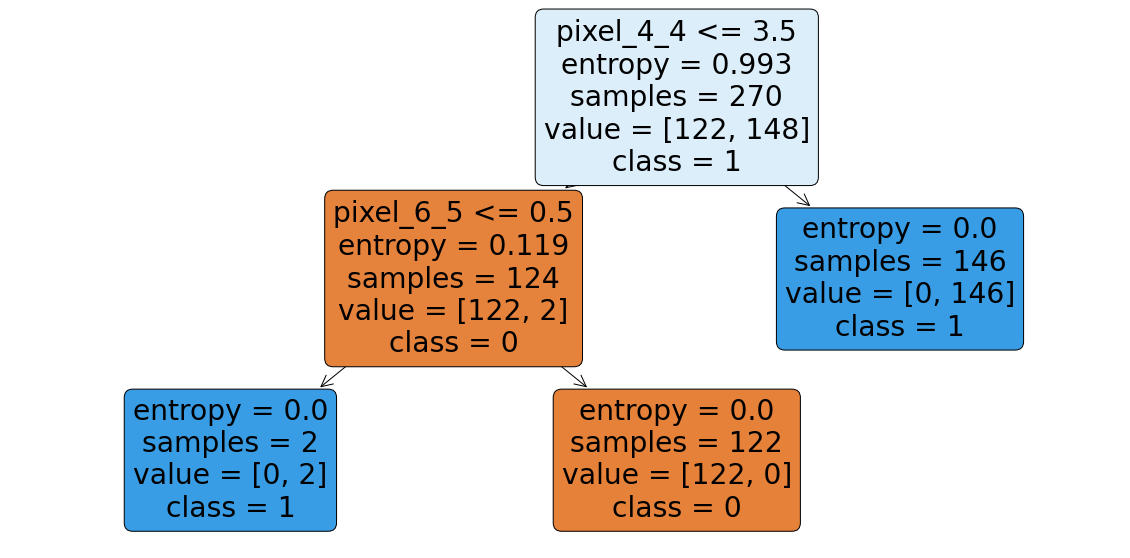




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


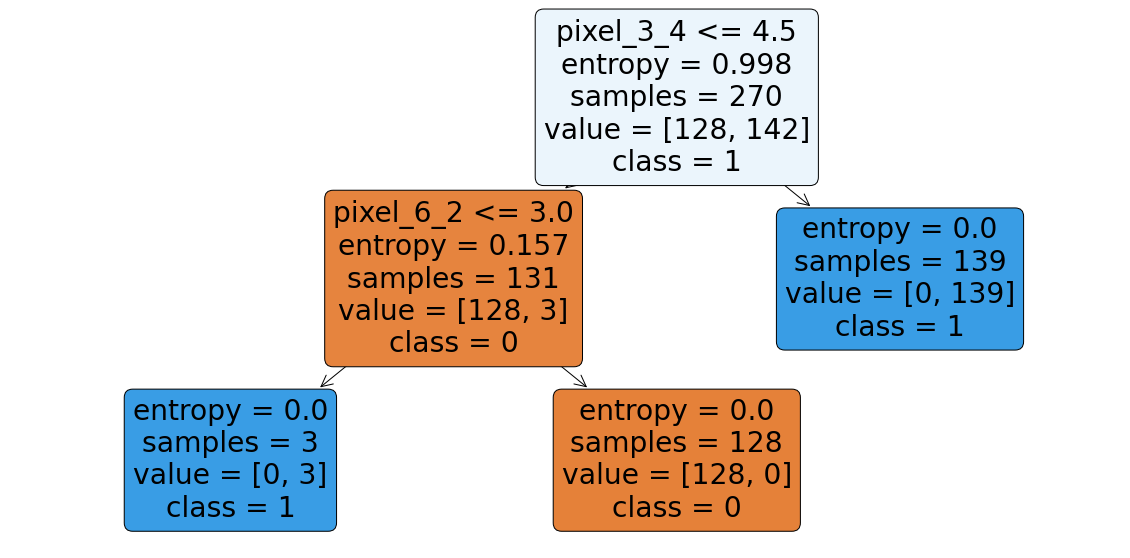




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=3, number of leaves = 4


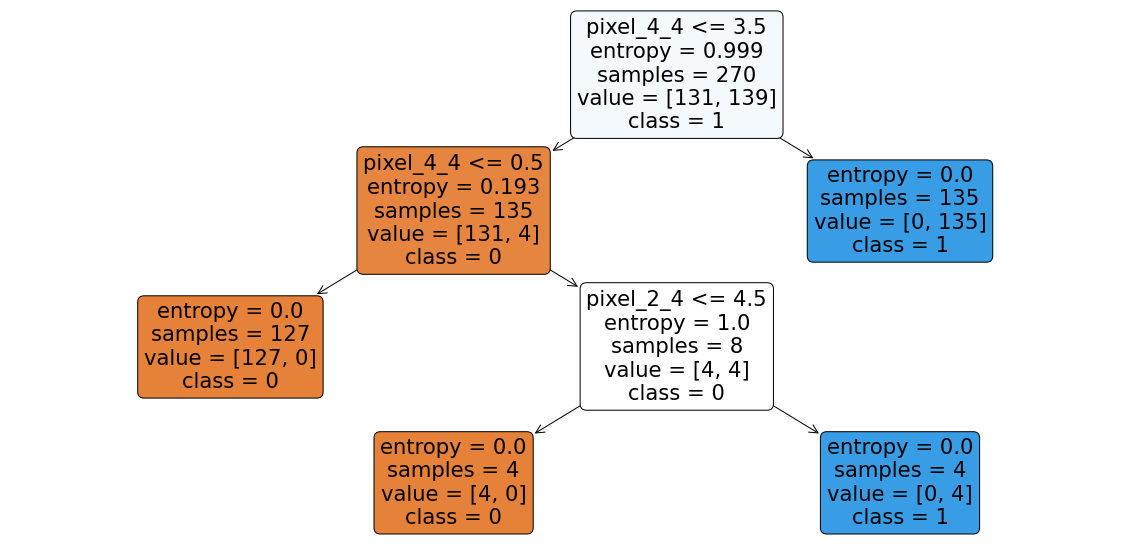




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=3, number of leaves = 4


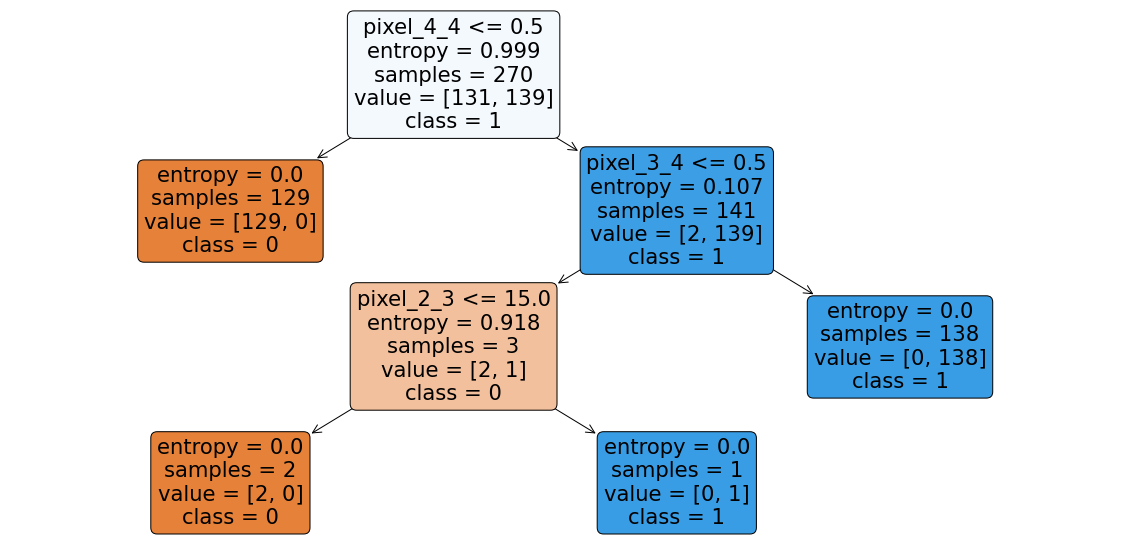




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


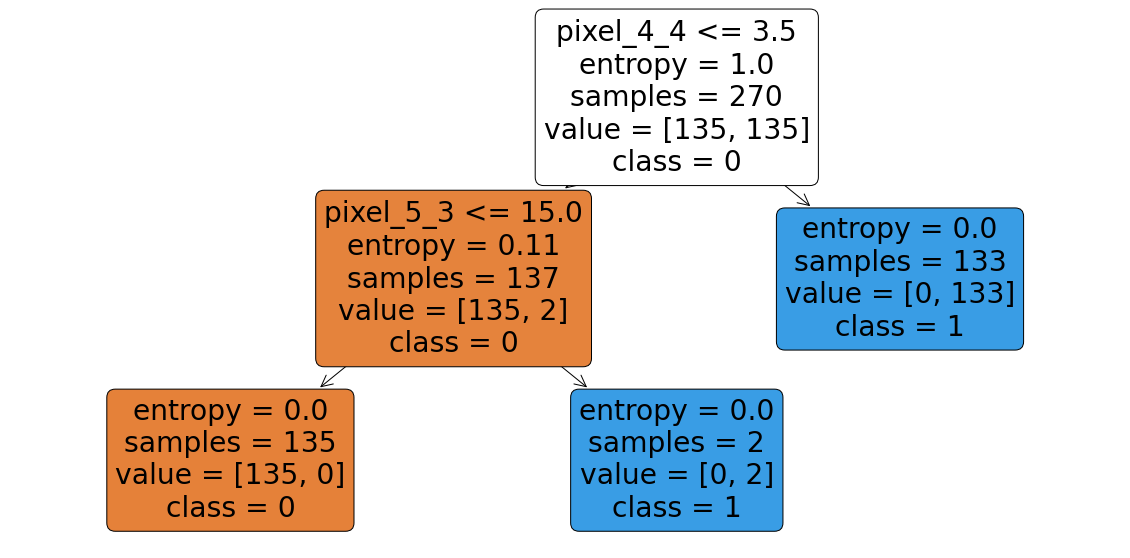




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=3, number of leaves = 4


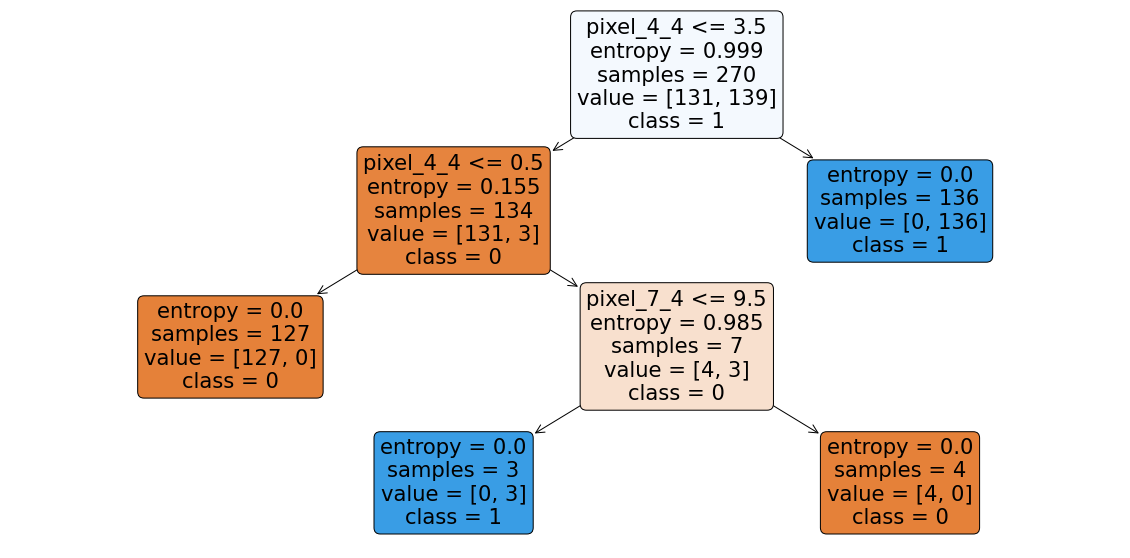




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=3, number of leaves = 4


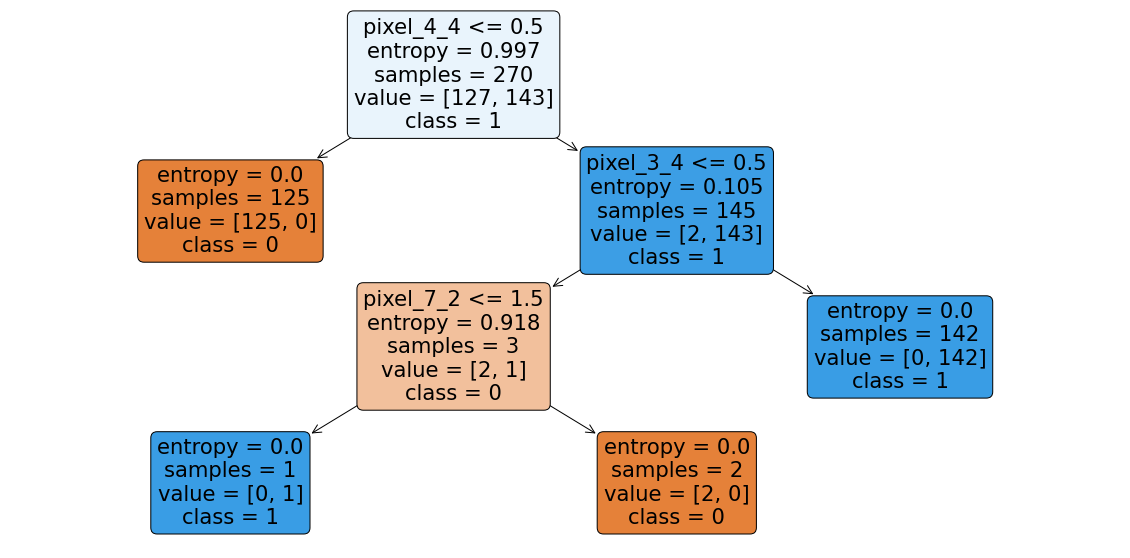




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=3, number of leaves = 4


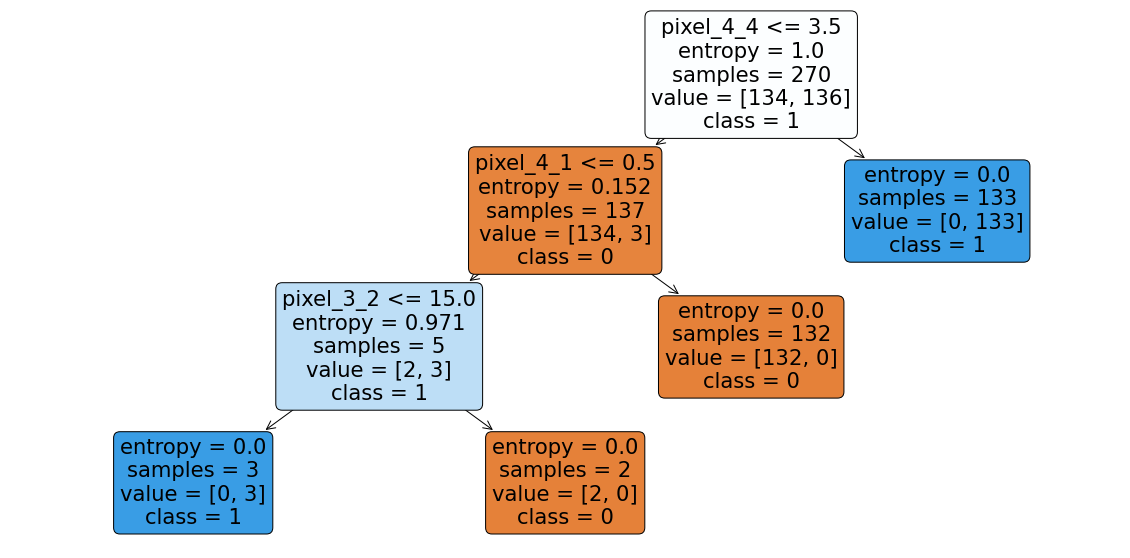




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


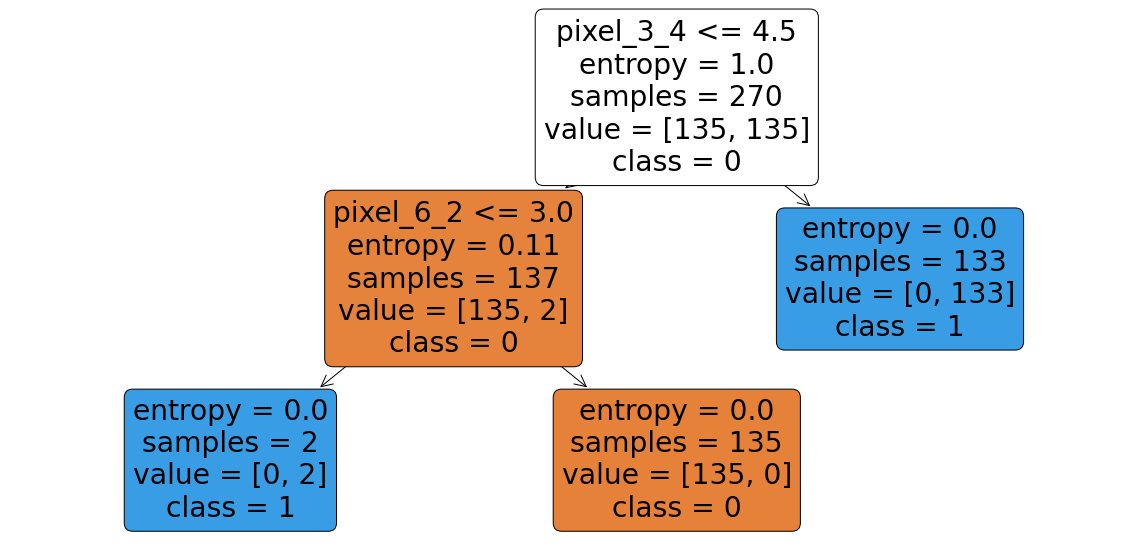




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=3, number of leaves = 4


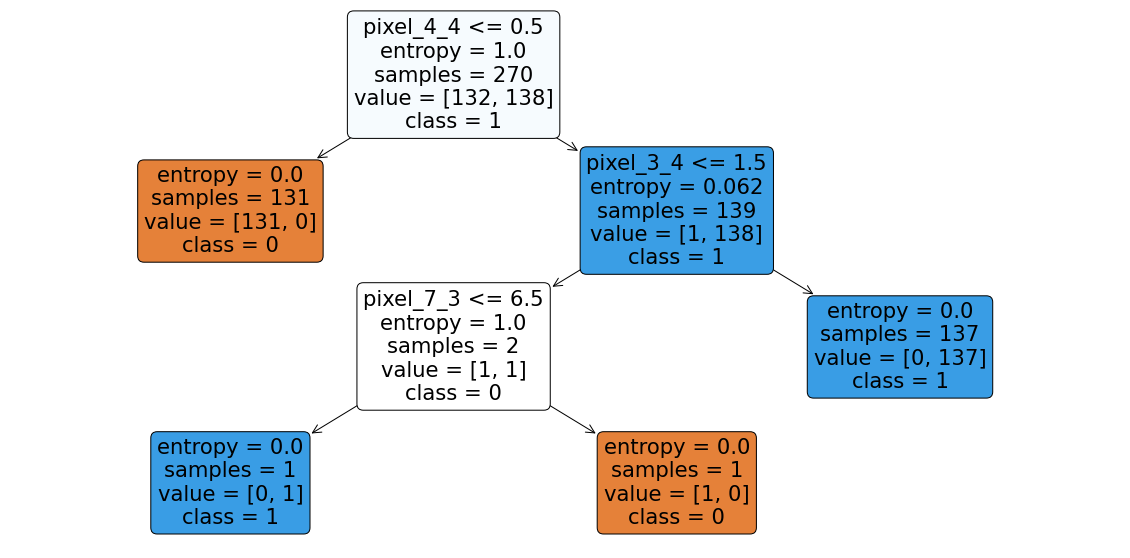




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


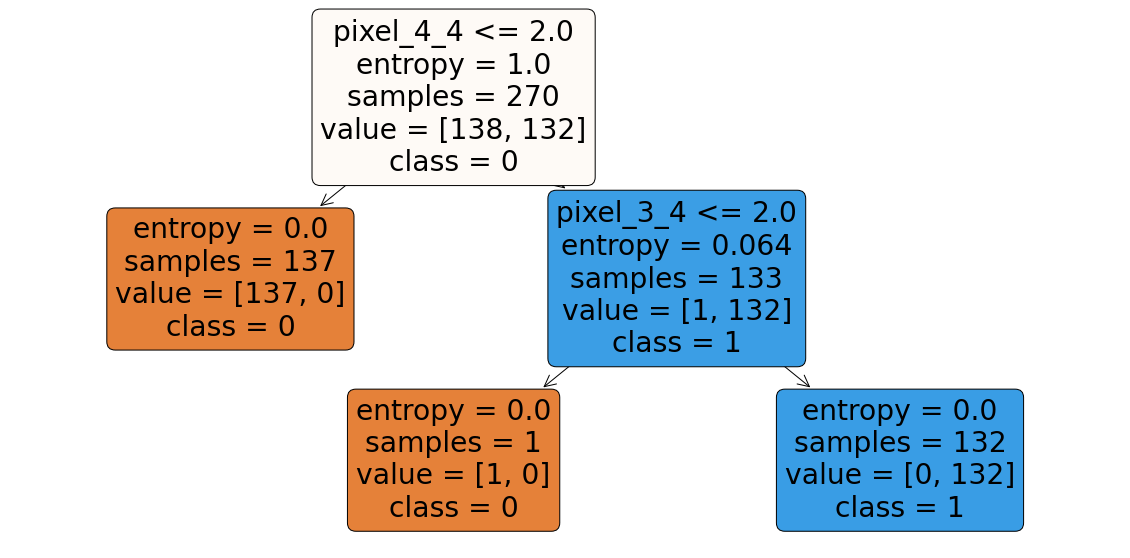




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


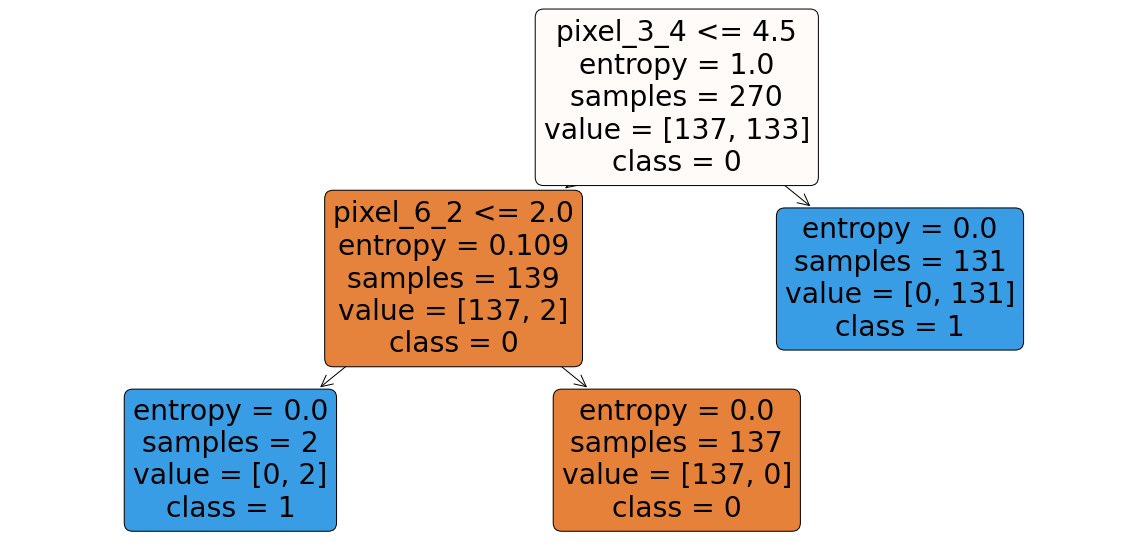




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


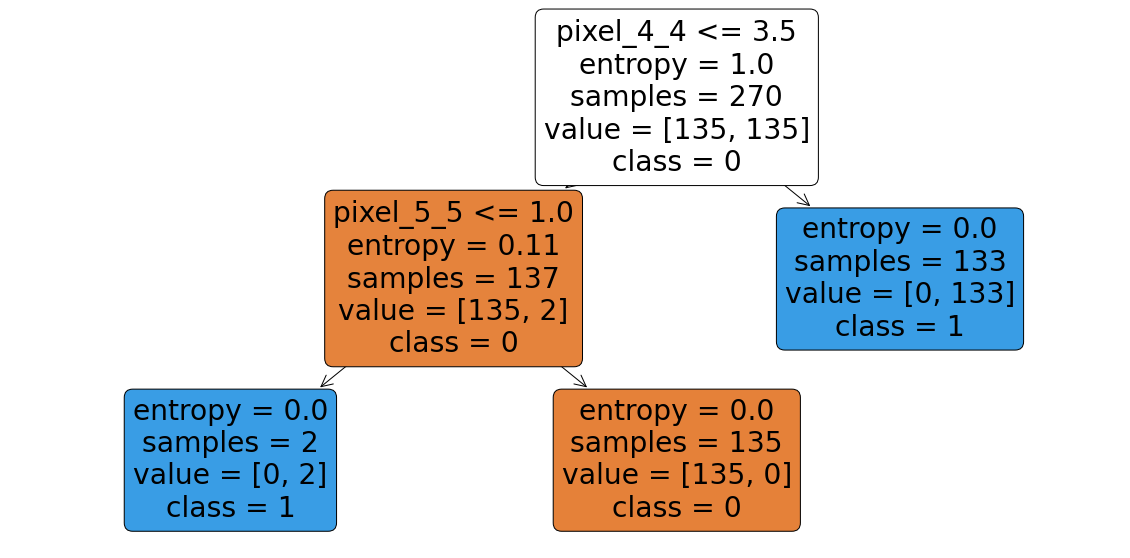




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


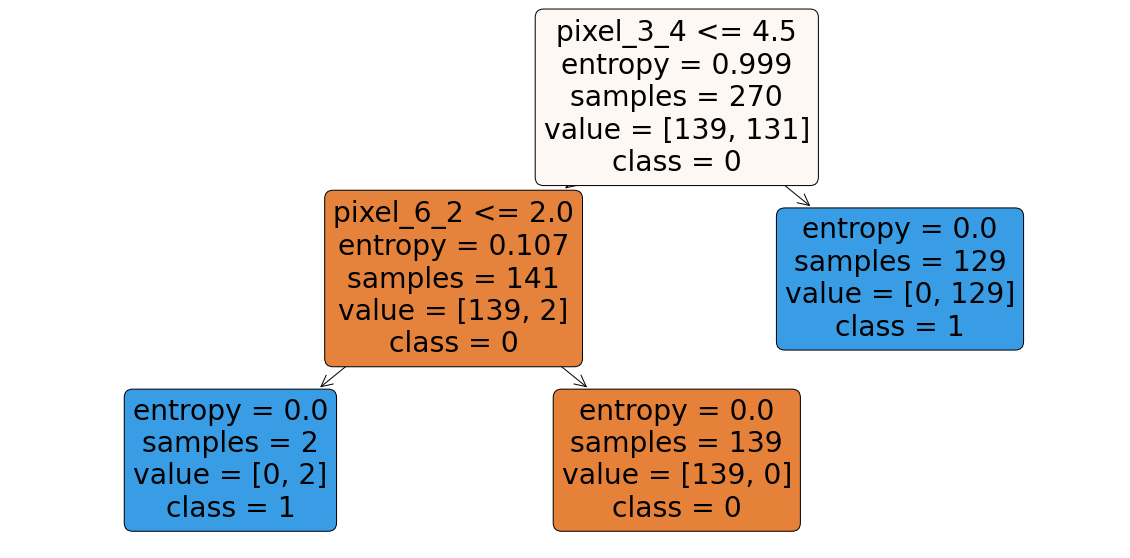




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


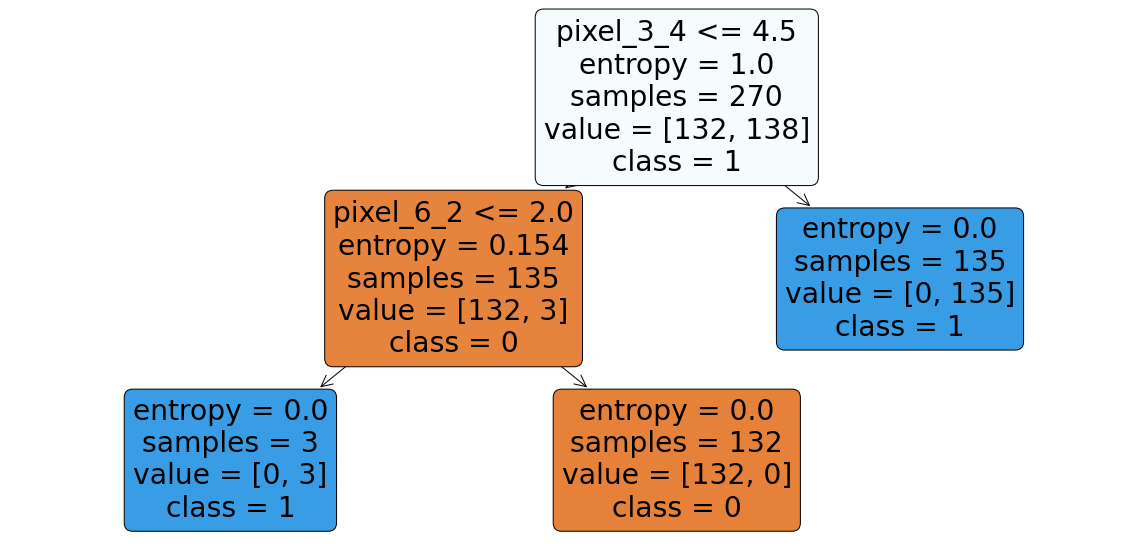




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


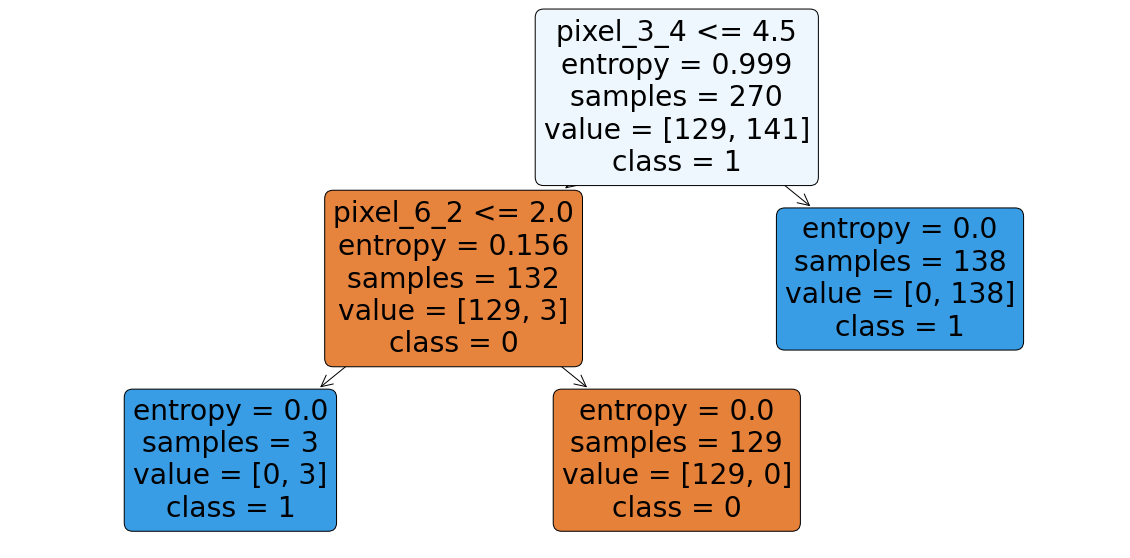




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


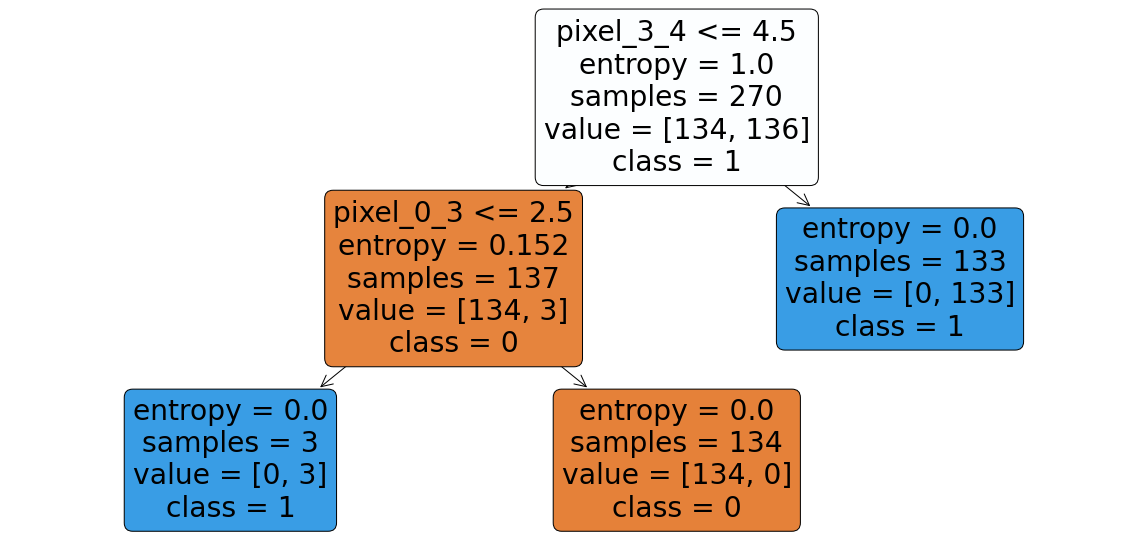




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


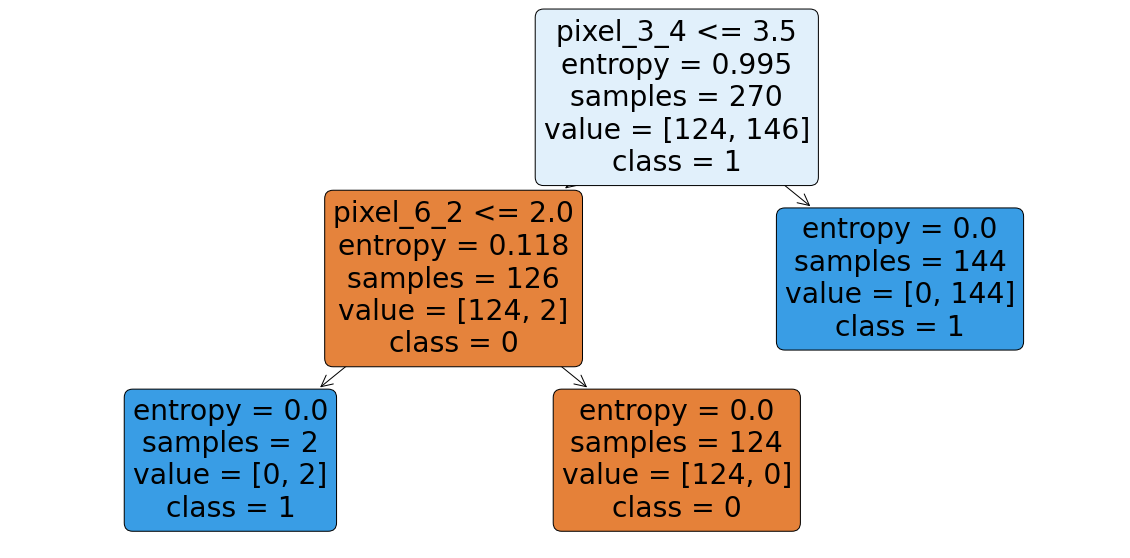




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


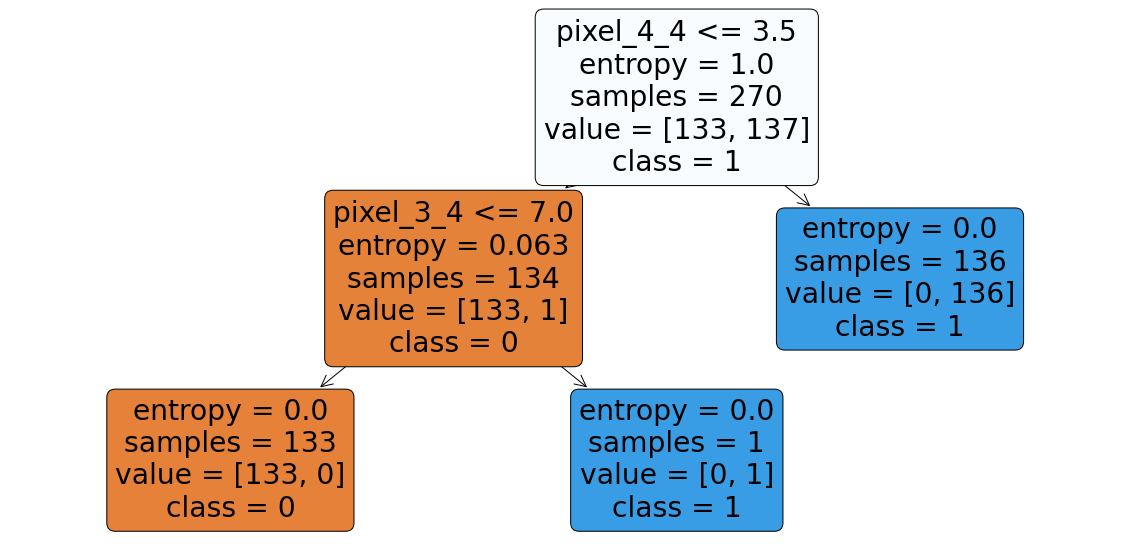




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=3, number of leaves = 4


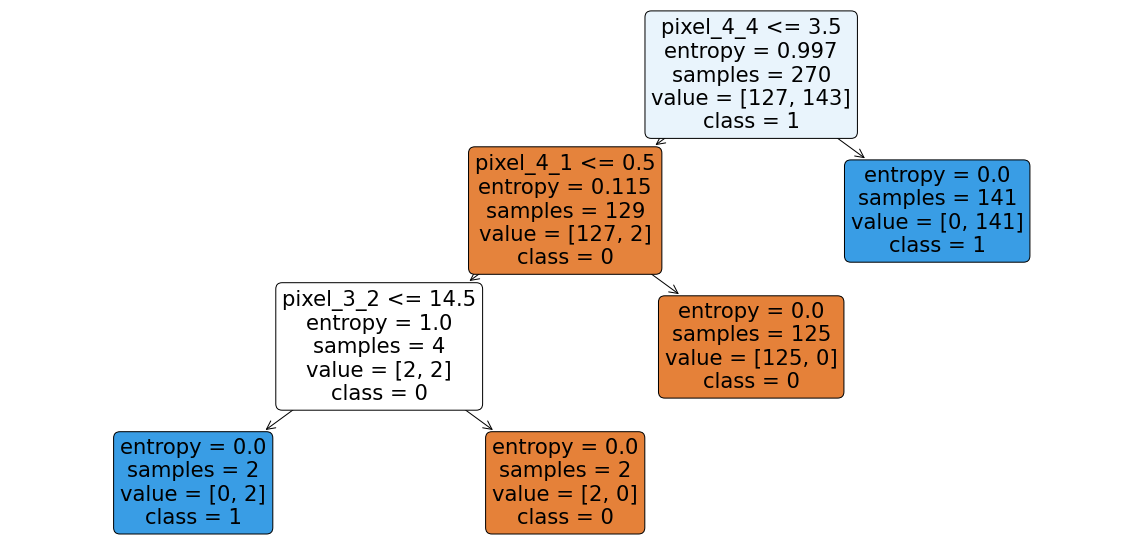




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


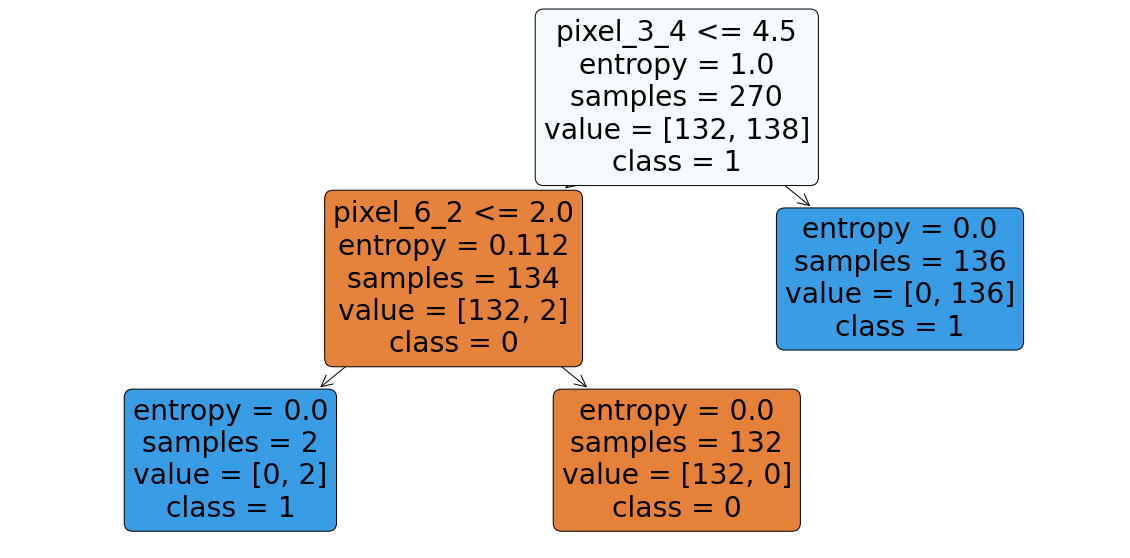




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


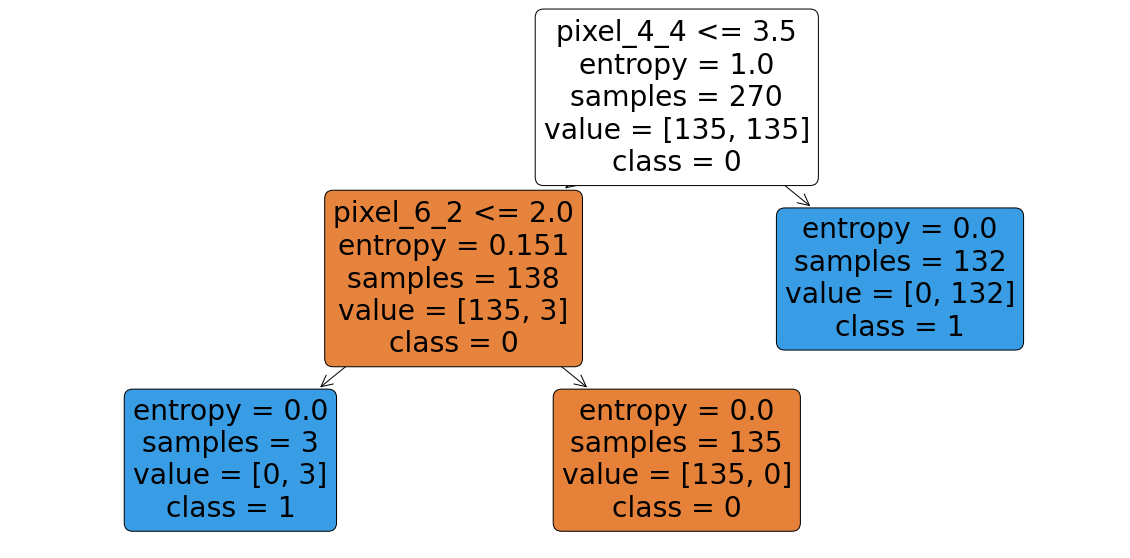




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=3, number of leaves = 4


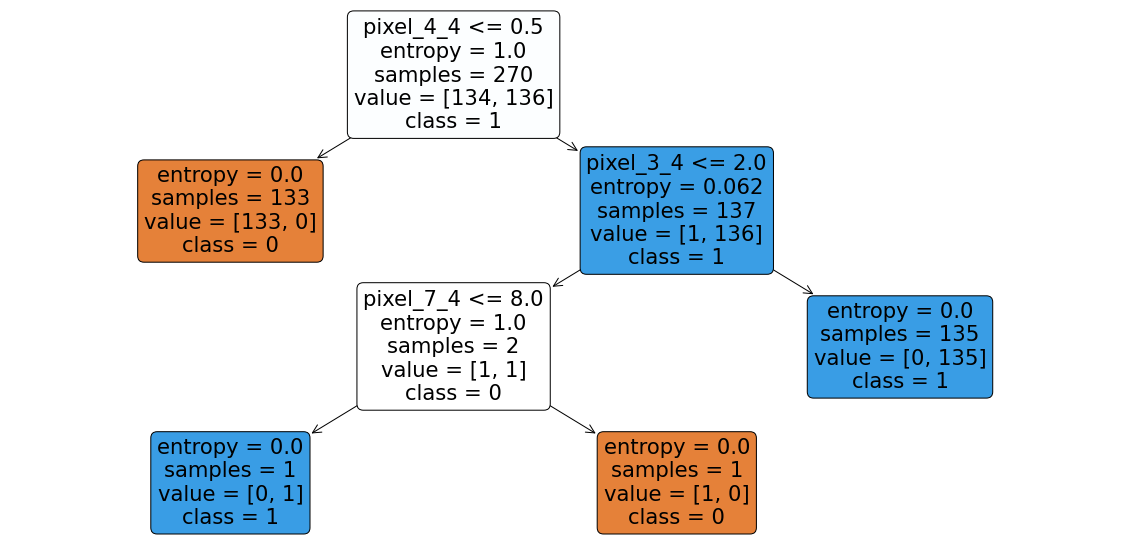




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


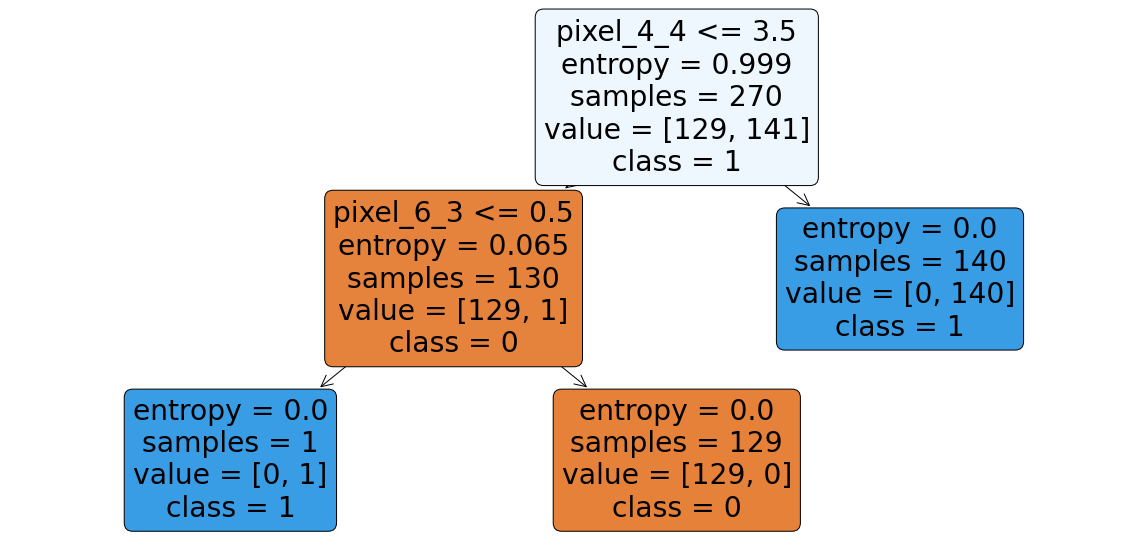




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


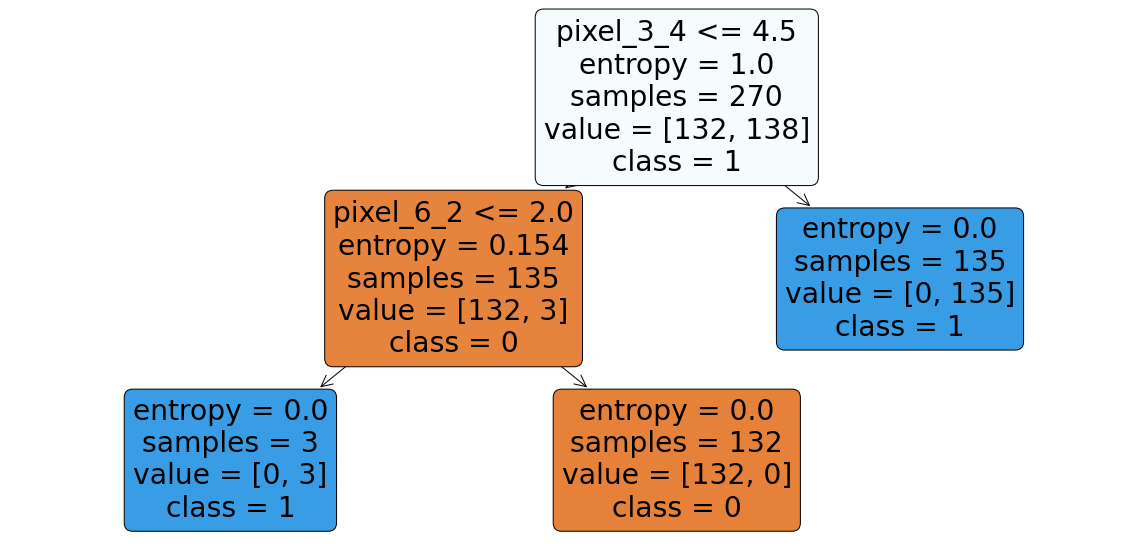




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


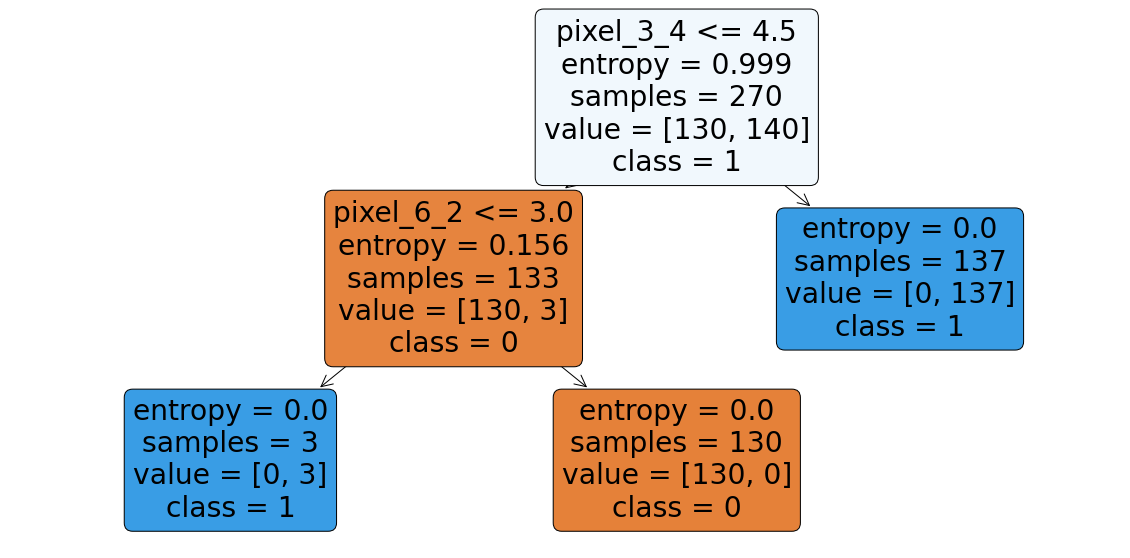




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


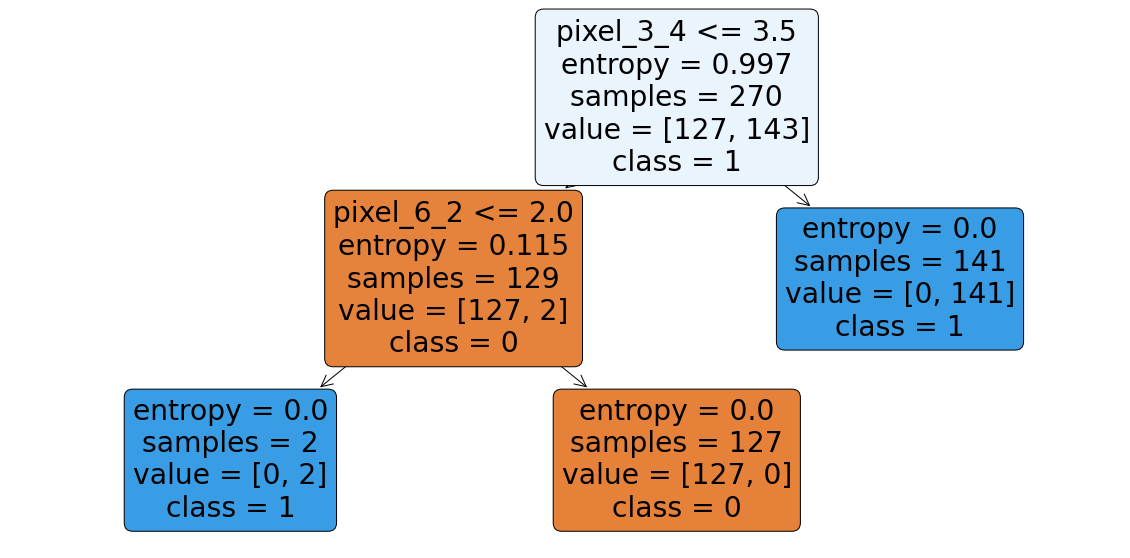




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=3, number of leaves = 4


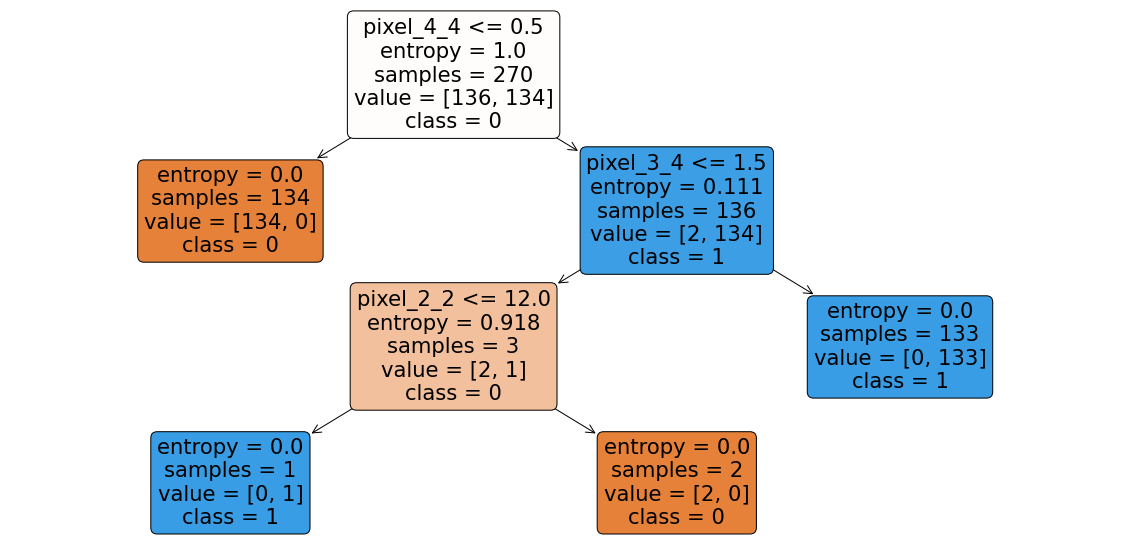




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=1, number of leaves = 2


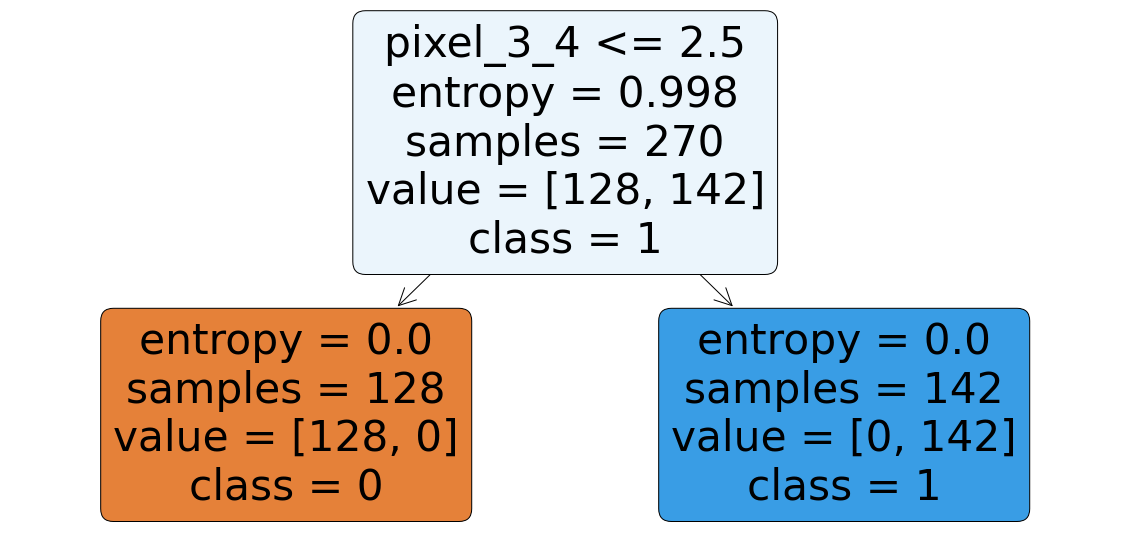




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


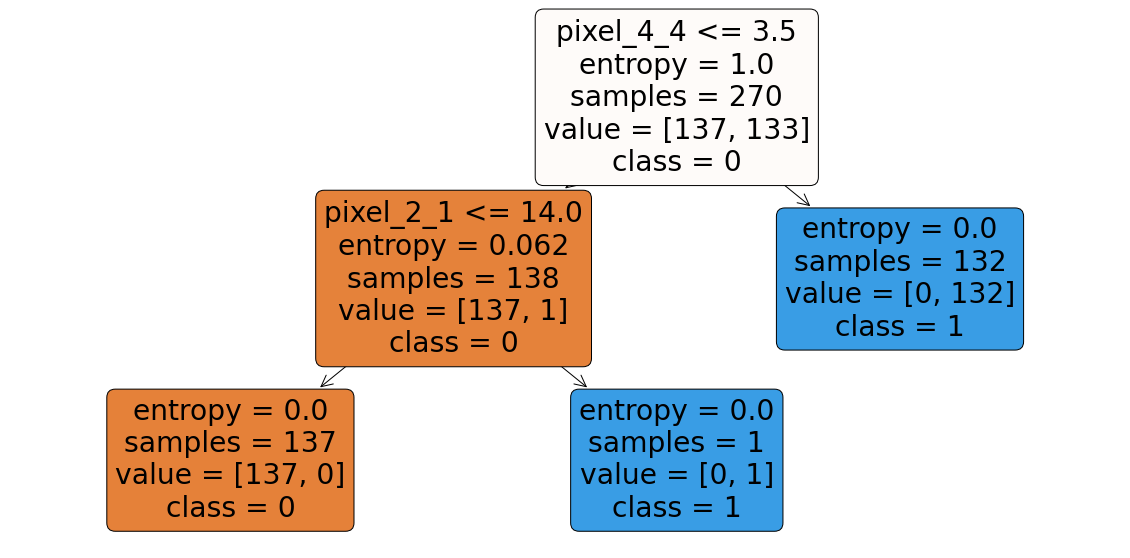




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


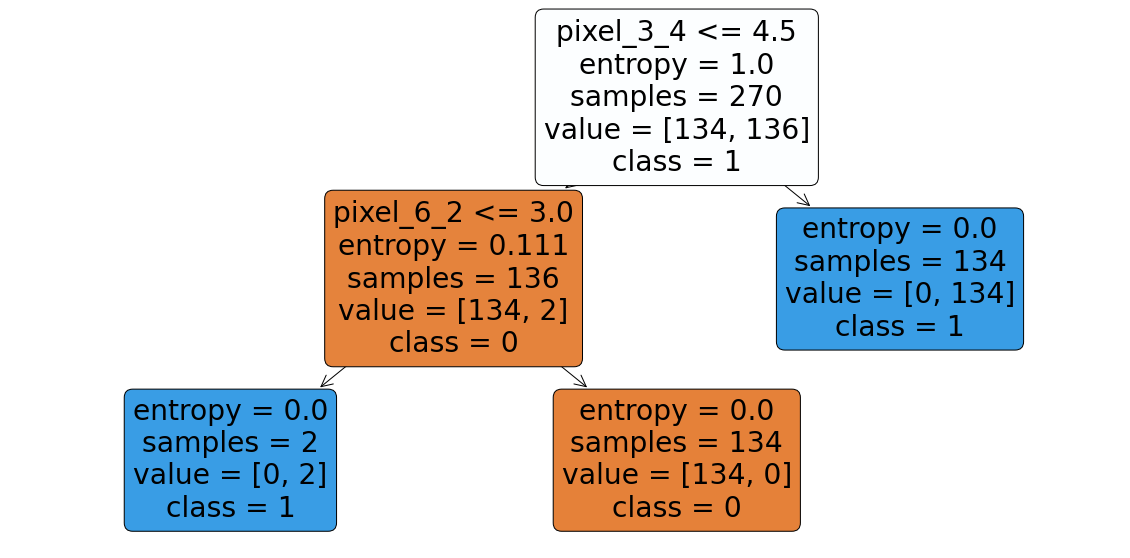




Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=2, number of leaves = 3


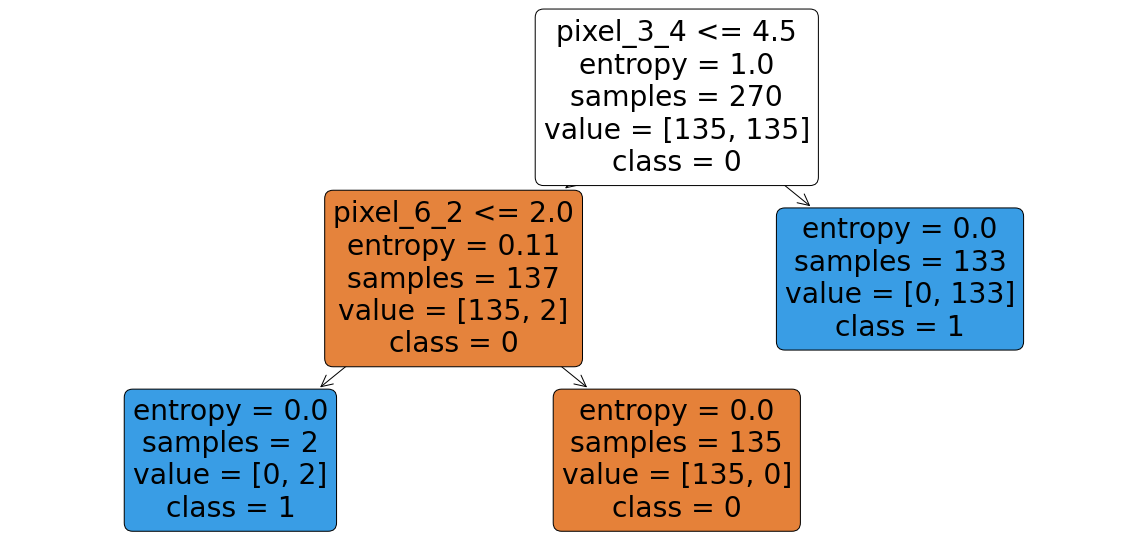

Average of accuracy score on train dataset:  1.0
Average of accuracy score on test dataset:  0.9877777777777779
Varaince of accuracy score on test dataset:  0.00017407407407407413


In [5]:
train_scores = []
test_scores = []
for seed in range(50):
	
	# import (load) the DecisionTreeClassifier class from scikit-learn package
	from sklearn import tree
	from sklearn.model_selection import train_test_split

	# get labeled data from somewhere
	from sklearn.datasets import load_digits
	dataset = load_digits(n_class=2)
	X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, random_state=seed)
	import numpy as np
	dataset.target_names = np.array([str(i) for i in dataset.target_names])

	# create a decision tree classifier
	clf = tree.DecisionTreeClassifier(criterion="entropy")

	# fit the classifier to the dataset
	clf = clf.fit(X_train, y_train)

	# save and plot decision tree
	import matplotlib.pyplot as plt
	plt.figure(figsize=(20, 10)) # increase fig size
	tree.plot_tree(clf, feature_names=dataset.feature_names, class_names=dataset.target_names, filled=True, rounded=True)
	print(f"\n\n")
	print(f"Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1")
	print(f"max_depth={clf.get_depth()}, number of leaves = {clf.get_n_leaves()}")
	plt.show()

	# test the accuracy of the learned decision tree
	from sklearn.metrics import accuracy_score
	train_score = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
	test_score = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))

	# collect accuracy scores
	train_scores.append(train_score)
	test_scores.append(test_score)

import numpy as np
print("Average of accuracy score on train dataset: ", np.array([train_scores]).mean())
print("Average of accuracy score on test dataset: ", np.array([test_scores]).mean())
print("Varaince of accuracy score on test dataset: ", np.array([test_scores]).var())

---
# Tackling Overfitting
## 1. Early-stopping

`max_depth` (int): 
- the maximum depth of the tree
- Default: None 
  - nodes are expanded until leaves are pure or until leaves contain less than min_samples_split samples
- indicates how deep the decision tree can be
- the deeper the tree, the more splits it has and captures more information about the data
- However, in general, a decision tree overfits for large depth values. It can perfectly predict all the training data, but fail to generalize the findings for new data.

`min_samples_split` (int or float): 
- the minimum number of samples required to split an internal node
- Default: 2
  - Default setting means no early-stopping.
  - Increase value to stop early. With proper setting, this can avoid overfitting. Overly large value will prevent the tree from learning the data.

`min_samples_leaf` (int or float): 
- the minimum number of samples required to be at a leaft node
- Default: 1
  - Default setting means no early-stopping.
  - Incrase value to stop early. Like `min_samples_split`, with proper setting, this can avoid overfitting. Overly large value will prevent the tree from learning the data.
  - Unlike `min_samples_split` which can create arbitrarily small leaves, `min_samples_leaf` guarantees that each leaf has a minimum size.





Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1
max_depth=11, number of leaves = 41


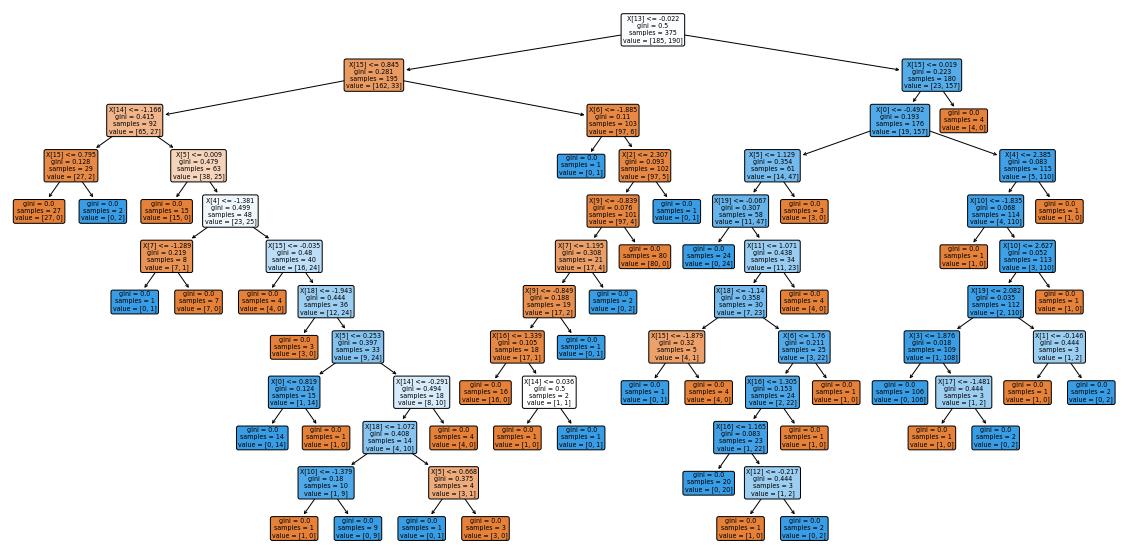

Accuracy score on train dataset:  1.0
Accuracy score on test dataset:  0.76



Decision Tree with max_depth=4
max_depth=4, number of leaves = 12


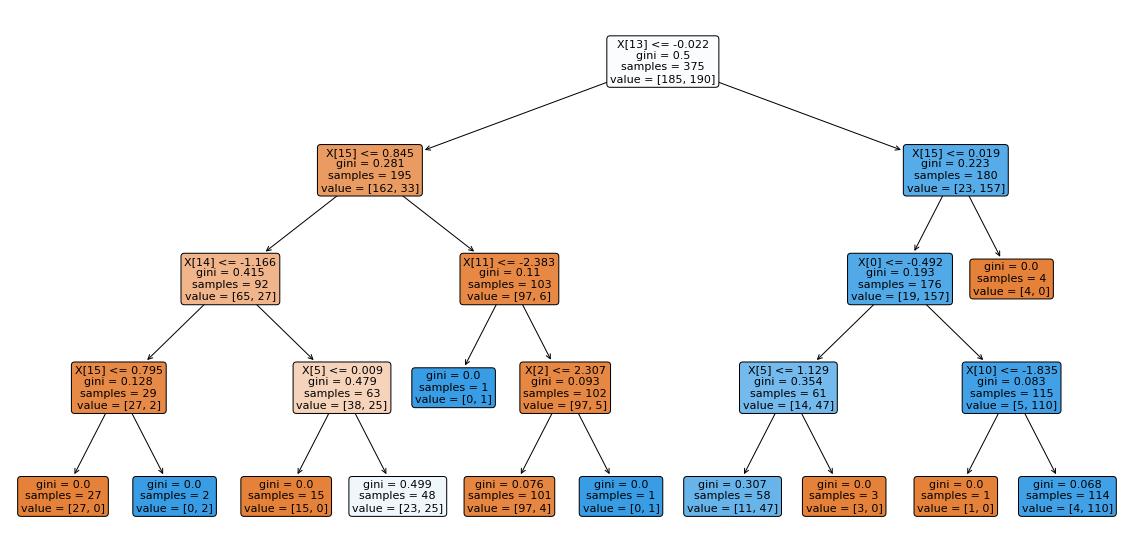

Accuracy score on train dataset:  0.888
Accuracy score on test dataset:  0.896



Decision Tree with min_samples_split=10
max_depth=11, number of leaves = 34


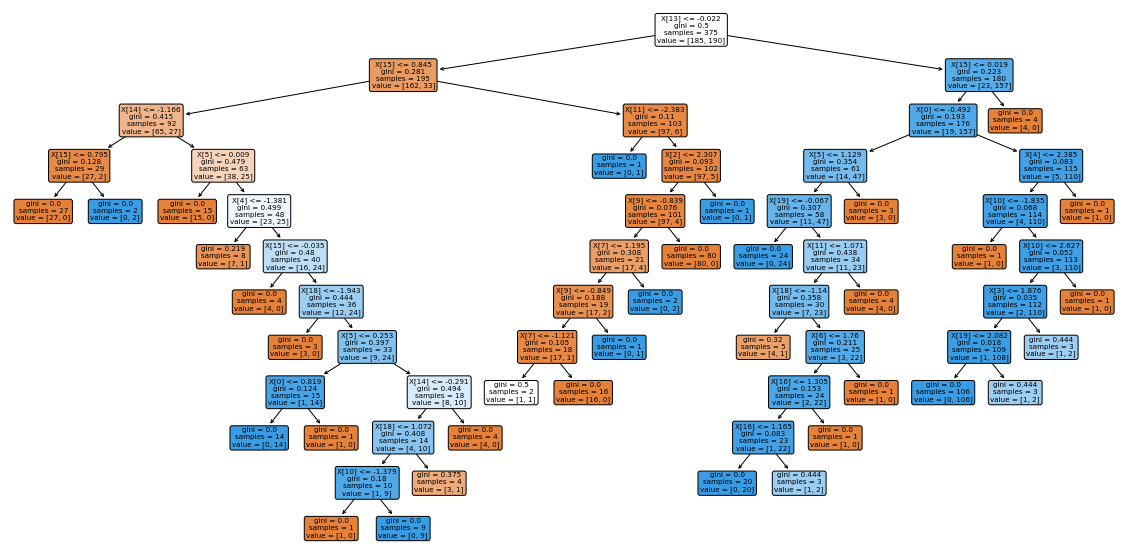

Accuracy score on train dataset:  0.9813333333333333
Accuracy score on test dataset:  0.824



Decision Tree with min_samples_leaf=5
max_depth=8, number of leaves = 28


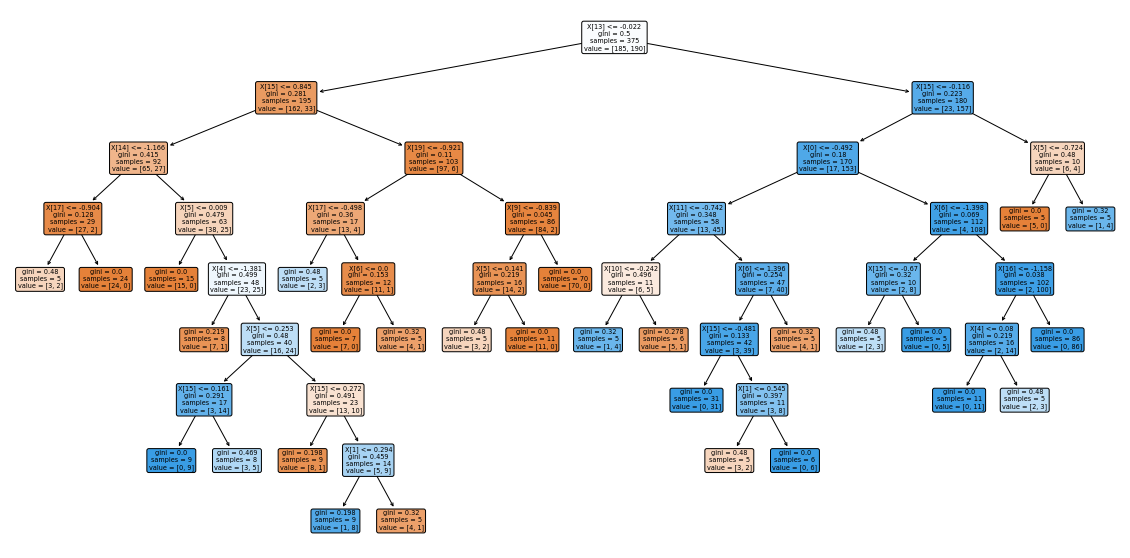

Accuracy score on train dataset:  0.936
Accuracy score on test dataset:  0.872


In [2]:
# import (load) the DecisionTreeClassifier class from scikit-learn package
from sklearn import tree

# get labeled data from somewhere
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, n_samples=500, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)




#################
# Decision Tree with default settings
#################
# create a decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=0)

# fit the classifier to the dataset
clf = clf.fit(X_train, y_train)

# save and plot decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10)) # increase fig size
tree.plot_tree(clf, filled=True, rounded=True)
plt.savefig("result_avoid_overfitting_1.pdf") # save fig
print(f"\n\n")
print(f"Decision Tree with default setting: max_depth=None, min_samples_split=2, min_samples_leaf=1")
print(f"max_depth={clf.get_depth()}, number of leaves = {clf.get_n_leaves()}")
plt.show()

# test the accuracy of the learned decision tree
from sklearn.metrics import accuracy_score
train_score = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
print("Accuracy score on train dataset: ", train_score)
print("Accuracy score on test dataset: ", test_score)
#################
#################




#################
# Decision Tree with max_depth=4
#################
# create a decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, random_state=0)

# fit the classifier to the dataset
clf = clf.fit(X_train, y_train)

# save and plot decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10)) # increase fig size
tree.plot_tree(clf, filled=True, rounded=True)
plt.savefig("result_avoid_overfitting_2.pdf") # save fig
print(f"\n\n")
print(f"Decision Tree with max_depth=4")
print(f"max_depth={clf.get_depth()}, number of leaves = {clf.get_n_leaves()}")
plt.show()

# test the accuracy of the learned decision tree
from sklearn.metrics import accuracy_score
train_score = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
print("Accuracy score on train dataset: ", train_score)
print("Accuracy score on test dataset: ", test_score)
#################
#################




#################
# Decision Tree with min_samples_split=10
#################
# create a decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=10, min_samples_leaf=1, random_state=0)

# fit the classifier to the dataset
clf = clf.fit(X_train, y_train)

# save and plot decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10)) # increase fig size
tree.plot_tree(clf, filled=True, rounded=True)
plt.savefig("result_avoid_overfitting_3.pdf") # save fig
print(f"\n\n")
print(f"Decision Tree with min_samples_split=10")
print(f"max_depth={clf.get_depth()}, number of leaves = {clf.get_n_leaves()}")
plt.show()

# test the accuracy of the learned decision tree
from sklearn.metrics import accuracy_score
train_score = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
print("Accuracy score on train dataset: ", train_score)
print("Accuracy score on test dataset: ", test_score)
#################
#################




#################
# Decision Tree with min_samples_leaf=5
#################
# create a decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=5, random_state=0)

# fit the classifier to the dataset
clf = clf.fit(X_train, y_train)

# save and plot decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10)) # increase fig size
tree.plot_tree(clf, filled=True, rounded=True)
plt.savefig("result_avoid_overfitting_4.pdf") # save fig
print(f"\n\n")
print(f"Decision Tree with min_samples_leaf=5")
print(f"max_depth={clf.get_depth()}, number of leaves = {clf.get_n_leaves()}")
plt.show()

# test the accuracy of the learned decision tree
from sklearn.metrics import accuracy_score
train_score = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
print("Accuracy score on train dataset: ", train_score)
print("Accuracy score on test dataset: ", test_score)
#################
#################

## 2. Pruning

`ccp_alpha` (non-negative float):
- control how much pruning we want
- Default: 0.0
  - By default, pruning is disabled. Increase value to increase the number of nodes pruned. 
  - Check [here](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) for more analysis about this pruning technique

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_classes=2, n_samples=500, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [1]:
# import (load) the DecisionTreeClassifier class from scikit-learn package
from sklearn import tree

# get labeled data from somewhere
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, n_samples=500, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)




#################
# Decision Tree with ccp_alpha=0.0125
#################
# create a decision tree classifier
clf = tree.DecisionTreeClassifier(ccp_alpha=0.0125, random_state=0)

# fit the classifier to the dataset
clf = clf.fit(X_train, y_train)

# save and plot decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10)) # increase fig size
# tree.plot_tree(clf, feature_names=dataset.feature_names, class_names=dataset.target_names, filled=True, rounded=True)
tree.plot_tree(clf, filled=True, rounded=True)
plt.savefig("result_avoid_overfitting_5.pdf") # save fig
print(f"\n\n")
print(f"Decision Tree with ccp_alpha=0.015")
print(f"max_depth={clf.get_depth()}, number of leaves = {clf.get_n_leaves()}")
plt.show()

# test the accuracy of the learned decision tree
from sklearn.metrics import accuracy_score
train_score = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
print("Accuracy score on train dataset: ", train_score)
print("Accuracy score on test dataset: ", test_score)
#################
#################



#################
# Decision Tree with default settings
#################
# create a decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=0)

# fit the classifier to the dataset
clf = clf.fit(X_train, y_train)

# test the accuracy of the learned decision tree
from sklearn.metrics import accuracy_score
train_score = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
test_score = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
print("For comparison:")
print("(Default setting) Accuracy score on train dataset: ", train_score)
print("(Default setting) Accuracy score on test dataset: ", test_score)
#################
#################

NameError: name 'train_test_split' is not defined

## Build decision tree on discrete dataset
Let's use the example dataset from page 21 of lecture node [decision tree](https://course.cse.ust.hk/comp4331/chap3b_dtx.pdf) to build a decision tree.
> Note: DecisionTreeClassifier *currently* doesn't support categorical input variable. As a workaround, we represent every category of each feature as a feature (one-hot encode). This is an example of data preprocessing.

In [ ]:
#################
# Preprocessing categorical dataset
#################
import numpy as np
class course_dataset:
	data = np.array([
		[1, 3, 1, 1],
		[1, 3, 1, 2],
		[2, 3, 1, 1],
		[3, 2, 1, 1],
		[3, 1, 2, 1],
		[3, 1, 2, 2],
		[2, 1, 2, 2],
		[1, 2, 1, 1],
		[1, 1, 2, 1],
		[3, 2, 2, 1],
		[1, 2, 2, 2],
		[2, 2, 1, 2],
		[2, 3, 2, 1],
		[3, 2, 1, 2],
	])
	target = np.array(
		[1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1]
	)
	feature_names = ['age', 'income', 'student', 'credit_rating']
	feature_names = ["youth", "middle aged", "senior", "low income", "medium income", "high income", "not student", "is student", "fair credit", "excellent credit"]
	target_names = np.array(["no", "yes"], dtype="<U10")

from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
X = [[1,1,1,1], [2,2,2,2], [3,3,2,2]]
enc.fit(X)
course_dataset.data = enc.transform(course_dataset.data).toarray()

#################
# Build decision tree and test decision tree
#################
# import (load) the DecisionTreeClassifier class from scikit-learn package
from sklearn import tree

# get labeled data from somewhere
dataset = course_dataset
X_train, y_train = dataset.data, dataset.target

# create a decision tree classifier
clf = tree.DecisionTreeClassifier()

# fit the classifier to the dataset
clf = clf.fit(X_train, y_train)

# save and plot decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10)) # increase fig size
tree.plot_tree(clf, feature_names=dataset.feature_names, 
				class_names=dataset.target_names, filled=True, rounded=True)
plt.savefig("result_course_dataset.pdf")
plt.show()

# test the accuracy of the learned decision tree
from sklearn.metrics import accuracy_score
train_score = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
print("Accuracy score on train dataset: ", train_score)